In [1]:
%load_ext autoreload

# Enable autoreload for all modules
%autoreload 2

import sys
sys.path.append("..")

from loader import hetero_graph_loader, hetero_graph_loader_faz
import torch
import json
import matplotlib.pyplot as plt
import numpy as np
from graph_plotting import graph_2D
from utils import prep

In [2]:
# print the current path
!pwd
# change the current path
%cd ..


/home/laurin/Documents/OCTA_project/repo/OCTA_gnn/notebooks


/home/laurin/Documents/OCTA_project/repo/OCTA_gnn


/home/laurin/Documents/OCTA_project/repo/OCTA_gnn/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:

octa_dr_dict = {"Healthy": 0, "DM": 1, "PDR": 4, "Early NPDR": 2, "Late NPDR": 3}
label_names = ["Healthy/DM", "NPDR", "PDR"]

data_type = "DCP"

#vessel_graph_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_vessel_graph"
#label_file = "/media/data/alex_johannes/octa_data/Cairo/labels.csv"
#void_graph_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_void_graph"
#hetero_edges_path = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_heter_edges"

vessel_graph_path = f"../data/{data_type}_vessel_graph"
void_graph_path = f"../data/{data_type}_void_graph_faz_node"
hetero_edges_path = f"../data/{data_type}_heter_edges_faz_node"

faz_node_path = f"../data/{data_type}_faz_nodes"
faz_region_edge_path = f"../data/{data_type}_faz_region_edges"
faz_vessel_edge_path = f"../data/{data_type}_faz_vessel_edges"

label_file = "../data/labels.csv"


#mode_train = "train"
#train_pickle = f"../data/{data_type}_{mode_train}_dataset.pkl"
#train_dataset = hetero_graph_loader.HeteroGraphLoaderTorch(vessel_graph_path,
#                                                        void_graph_path,
#                                                        hetero_edges_path,
#                                                        mode = mode_train,
#                                                        label_file = label_file, 
#                                                        line_graph_1 =True, 
#                                                        class_dict = octa_dr_dict,
#                                                        pickle_file = train_pickle
#                                                        )

mode_train = "train"
train_pickle = f"../data/{data_type}_{mode_train}_dataset_faz.pkl"
train_dataset = hetero_graph_loader_faz.HeteroGraphLoaderTorch(graph_path_1=vessel_graph_path,
                                                        graph_path_2=void_graph_path,
                                                        graph_path_3=faz_node_path,
                                                        hetero_edges_path_12=hetero_edges_path,
                                                        hetero_edges_path_13=faz_vessel_edge_path,
                                                        hetero_edges_path_23=faz_region_edge_path,
                                                        mode = mode_train,
                                                        label_file = label_file, 
                                                        line_graph_1 =True, 
                                                        class_dict = octa_dr_dict,
                                                        pickle_file = train_pickle #f"../{data_type}_{mode_train}_dataset_faz.pkl" # f"../{data_type}_{mode_train}_dataset_faz.pkl"
                                                        )



#mode_test = "test"
#test_pickle = f"/media/data/alex_johannes/octa_data/Cairo/{data_type}_{mode_test}_dataset.pkl"
#test_dataset = hetero_graph_loader.HeteroGraphLoaderTorch(vessel_graph_path,
#                                                        void_graph_path,
#                                                        hetero_edges_path,
#                                                        mode = mode_test,
#                                                        label_file = label_file, 
#                                                        line_graph_1 =True, 
#                                                        class_dict = octa_dr_dict,
#                                                        pickle_file = test_pickle
#                                                        )


mode_test = "test"
test_pickle = f"../data/{data_type}_{mode_test}_dataset_faz.pkl"
test_dataset = hetero_graph_loader_faz.HeteroGraphLoaderTorch(graph_path_1=vessel_graph_path,
                                                        graph_path_2=void_graph_path,
                                                        graph_path_3=faz_node_path,
                                                        hetero_edges_path_12=hetero_edges_path,
                                                        hetero_edges_path_13=faz_vessel_edge_path,
                                                        hetero_edges_path_23=faz_region_edge_path,
                                                        mode = mode_test,
                                                        label_file = label_file, 
                                                        line_graph_1 =True, 
                                                        class_dict = octa_dr_dict,
                                                        pickle_file = test_pickle #f"../{data_type}_{mode_train}_dataset_faz.pkl" # f"../{data_type}_{mode_train}_dataset_faz.pkl"
                                                        )


# from loaded files, ensure that the classes are set properly
train_dataset.update_class(octa_dr_dict)
test_dataset.update_class(octa_dr_dict)


# imputation and normalization
prep.hetero_graph_imputation(train_dataset)
prep.hetero_graph_imputation(test_dataset)

prep.add_node_features(train_dataset, ["graph_1", "graph_2"])
prep.add_node_features(test_dataset, ["graph_1", "graph_2"])

#prep.add_global_node(train_dataset)
#prep.add_global_node(test_dataset)


node_mean_tensors, node_std_tensors = prep.hetero_graph_normalization_params(train_dataset)
#node_mean_tensors = torch.load(f"../{data_type}_node_mean_tensors_global_node_node_degs.pt")
#node_std_tensors = torch.load(f"../{data_type}_node_std_tensors_global_node_node_degs.pt")

#print(node_mean_tensors)
#print(node_std_tensors)

#node_mean_tensors = torch.load(f"checkpoints/{data_type}_node_mean_tensors_global_node_node_degs.pt")
#node_std_tensors = torch.load(f"checkpoints/{data_type}_node_std_tensors_global_node_node_degs.pt")

prep.hetero_graph_normalization(train_dataset, node_mean_tensors, node_std_tensors)
prep.hetero_graph_normalization(test_dataset, node_mean_tensors, node_std_tensors)


FileNotFoundError: [Errno 2] No such file or directory: '../data/labels.csv'

In [199]:
mode_cv = "cv"
mode_final_test = "final_test"
data_type = "DCP"

cv_pickle_processed = f"../data/{data_type}_{mode_cv}_dataset_faz_isol_not_removed_more_features_processed_region_fix.pkl" # _dataset_faz_isol_not_removed_more_features_processed_cl.pkl" # _isol_not_removed_more_features
final_test_pickle_processed = f"../data/{data_type}_{mode_final_test}_dataset_faz_isol_not_removed_more_features_processed_region_fix.pkl" # _dataset_faz_isol_not_removed_more_features_processed_cl.pkl" #_isol_not_removed_more_features
split = 1

import pickle
#with open(cv_pickle_processed, "wb") as file:
#    pickle.dump(cv_dataset, file)
#
#with open(final_test_pickle_processed, "wb") as file:
#    pickle.dump(final_test_dataset, file)

#load the pickled datasets
with open(cv_pickle_processed, "rb") as file:
    cv_dataset = pickle.load(file)

with open(final_test_pickle_processed, "rb") as file:
    final_test_dataset = pickle.load(file)

train_dataset, val_dataset, test_dataset = prep.adjust_data_for_split(cv_dataset, final_test_dataset, split, faz = True)

print(test_dataset[0])

train dataset: 842
val dataset: 211
test dataset: 211
HeteroData(
  eye=False,
  y=[1],
  graph_id='0001_OS',
  graph_1={
    x=[1187, 42],
    pos=[1187, 2],
  },
  graph_2={
    x=[433, 21],
    pos=[433, 2],
  },
  faz={
    x=[1, 18],
    pos=[1, 2],
  },
  (graph_1, to, graph_1)={ edge_index=[2, 2268] },
  (graph_2, to, graph_2)={ edge_index=[2, 1828] },
  (graph_1, to, graph_2)={ edge_index=[2, 1513] },
  (graph_1, to, faz)={ edge_index=[2, 44] },
  (faz, to, graph_2)={ edge_index=[2, 31] },
  (faz, to, faz)={ edge_index=[2, 1] },
  (graph_2, rev_to, graph_1)={ edge_index=[2, 1513] },
  (faz, rev_to, graph_1)={ edge_index=[2, 44] },
  (graph_2, rev_to, faz)={ edge_index=[2, 31] }
)


In [31]:
# 22 vessel features
# 21 region features
# 18 labels in label dict len(label_dict_full["graph_1"])
# 18 labels in label dict len(label_dict_full["graph_2"])


# vessels need 4 more features
# regions need 3 more features


# vessels adds
# regions is fine, adds ["q25", "q75", "std"]

18

In [204]:
import copy
with open("feature_name_dict_new.json", "r") as file:
    label_dict_full = json.load(file)
    #features_label_dict = json.load(file)
features_label_dict = copy.deepcopy(label_dict_full)



#eliminate_features = {"graph_1":["num_voxels", "maxRadiusAvg", "hasNodeAtSampleBorder", "maxRadiusStd"], 
#                      "graph_2":["centroid_weighted-0", "centroid_weighted-1", "feret_diameter_max", "orientation"]}
#
#eliminate_features["faz"] = ["centroid_weighted-0", "centroid_weighted-1","feret_diameter_max", "orientation"]
## get positions of features to eliminate and remove them from the feature label dict and the graphs
#for key in eliminate_features.keys():
#    for feat in eliminate_features[key]:
#        idx = features_label_dict[key].index(feat)
#        features_label_dict[key].remove(feat)
#        for data in test_dataset:
#            data[key].x = torch.cat([data[key].x[:, :idx], data[key].x[:, idx+1:]], dim = 1)
#        for data in train_dataset:
#            data[key].x = torch.cat([data[key].x[:, :idx], data[key].x[:, idx+1:]], dim = 1)
#        for data in val_dataset:
#            data[key].x = torch.cat([data[key].x[:, :idx], data[key].x[:, idx+1:]], dim = 1)
    
features_label_dict["graph_1"] = features_label_dict["graph_1"][:-1] + ["centroid-0", "centroid-1", "area", "perimeter", "eccentricity", "equivalent_diameter", "orientation", "solidity", "feret_diameter_max", "extent", "axis_major_length", "axis_minor_length", "intensity_max", "intensity_mean", "intensity_min", "centroid_weighted-0", "centroid_weighted-1","std" ,"q5","q10", "q25", "q75", "q90", "q95"] #+ ["degree"] #["centroid-0", "centroid-1", "area", "perimeter", "eccentricity", "equivalent_diameter", "orientation", "solidity", "feret_diameter_max", "extent", "axis_major_length", "axis_minor_length", "intensity_max", "intensity_mean", "intensity_min", "centroid_weighted-0", "centroid_weighted-1","std" ,"q5","q10", "q25", "q75", "q90", "q95"] +  ["degree"] # ["centroid-0", "centroid-1", "area", "perimeter", "eccentricity", "equivalent_diameter", "orientation", "solidity", "feret_diameter_max", "extent", "axis_major_length", "axis_minor_length", "intensity_max", "intensity_mean", "intensity_min", "centroid_weighted-0", "centroid_weighted-1","std" ,"q5","q10", "q25", "q75", "q90", "q95"] # ["int_mean", "int_min", "int_max", "std", "q25", "q75"] # ["cl_mean", "cl_std", "q25", "q75"]#+ ["cl_mean", "cl_std", "sth", "sth"] #["int_mean", "int_max", "int_min", "std"]
features_label_dict["graph_2"] = features_label_dict["graph_2"][:-1] + ["q25", "q75", "std"] #+  ["degree"]
features_label_dict["faz"] = features_label_dict["faz"][:-1] #+["degree"] # + ["q25", "q75", "std"]

test_dataset[0]

HeteroData(
  eye=False,
  y=[1],
  graph_id='0001_OS',
  graph_1={
    x=[1187, 42],
    pos=[1187, 2],
  },
  graph_2={
    x=[433, 21],
    pos=[433, 2],
  },
  faz={
    x=[1, 18],
    pos=[1, 2],
  },
  (graph_1, to, graph_1)={ edge_index=[2, 2268] },
  (graph_2, to, graph_2)={ edge_index=[2, 1828] },
  (graph_1, to, graph_2)={ edge_index=[2, 1513] },
  (graph_1, to, faz)={ edge_index=[2, 44] },
  (faz, to, graph_2)={ edge_index=[2, 31] },
  (faz, to, faz)={ edge_index=[2, 1] },
  (graph_2, rev_to, graph_1)={ edge_index=[2, 1513] },
  (faz, rev_to, graph_1)={ edge_index=[2, 44] },
  (graph_2, rev_to, faz)={ edge_index=[2, 31] }
)

In [194]:
final_test_dataset[0]

HeteroData(
  eye=False,
  y=[1],
  graph_id='0001_OS',
  graph_1={
    x=[1187, 41],
    pos=[1187, 2],
  },
  graph_2={
    x=[433, 20],
    pos=[433, 2],
  },
  faz={
    x=[1, 17],
    pos=[1, 2],
  },
  (graph_1, to, graph_1)={ edge_index=[2, 2268] },
  (graph_2, to, graph_2)={ edge_index=[2, 1828] },
  (graph_1, to, graph_2)={ edge_index=[2, 1513] },
  (graph_1, to, faz)={ edge_index=[2, 44] },
  (faz, to, graph_2)={ edge_index=[2, 31] },
  (faz, to, faz)={ edge_index=[2, 1] },
  (graph_2, rev_to, graph_1)={ edge_index=[2, 1513] },
  (faz, rev_to, graph_1)={ edge_index=[2, 44] },
  (graph_2, rev_to, faz)={ edge_index=[2, 31] }
)

In [45]:
# read the feature_name_dict.json

with open("feature_name_dict.json", "r") as file:
    features_label_dict = json.load(file)


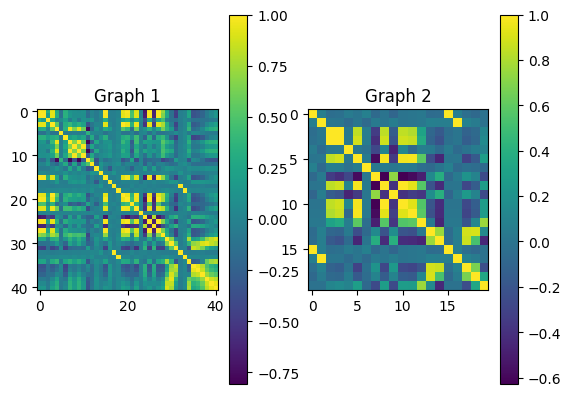

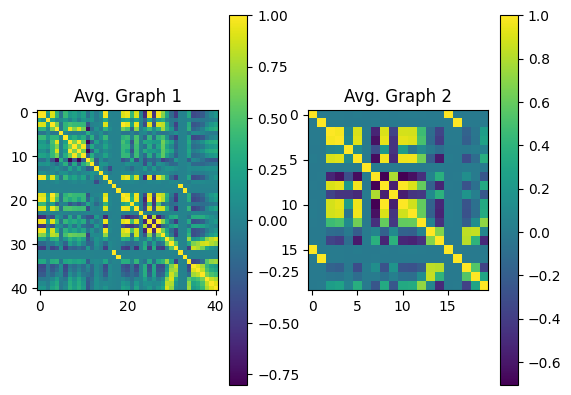

Graph 1
length distance
Correlation Value: 0.9814345240592957
length num_voxels
Correlation Value: 0.9918286800384521
length perimeter
Correlation Value: 0.9704903960227966
length feret_diameter_max
Correlation Value: 0.9668477177619934
length axis_major_length
Correlation Value: 0.9704773426055908
distance num_voxels
Correlation Value: 0.9715675711631775
distance feret_diameter_max
Correlation Value: 0.9648438692092896
distance axis_major_length
Correlation Value: 0.9687965512275696
volume area
Correlation Value: 0.9932716488838196
volume equivalent_diameter
Correlation Value: 0.9543233513832092
avgRadiusAvg maxRadiusAvg
Correlation Value: 0.9874823093414307
avgRadiusStd maxRadiusStd
Correlation Value: 0.9708899855613708
num_voxels perimeter
Correlation Value: 0.9582200050354004
num_voxels feret_diameter_max
Correlation Value: 0.9561083316802979
num_voxels axis_major_length
Correlation Value: 0.9609124660491943
centroid-0 centroid_weighted-0
Correlation Value: 0.9999997019767761
centr

In [205]:
# correlation analysis of the features

# iterate over all graphs in the training set and compute the correlation matrix
# for each graph
correlation_matrices = []

corr_graph_1 = None
corr_graph_2 = None

work_set = final_test_dataset
num_samp = len(final_test_dataset)

for i in range(len(work_set)):
    graph_1 = work_set[i]["graph_1"]
    graph_2 = work_set[i]["graph_2"]
    
    # torch corrcoef if none, otherwise add to the matrix
    corr_graph_1 = torch.corrcoef(graph_1.x.T) if corr_graph_1 is None else corr_graph_1 + torch.corrcoef(graph_1.x.T)
    # remove the diagonal
    #corr_graph_1 = corr_graph_1 - torch.diag(torch.diag(corr_graph_1))
    corr_graph_2 = torch.corrcoef(graph_2.x.T) if corr_graph_2 is None else corr_graph_2 + torch.corrcoef(graph_2.x.T)
    # remove the diagonal
    #corr_graph_2 = corr_graph_2 - torch.diag(torch.diag(corr_graph_2))

    if i ==0:
    ## plot the correlation matrices with imshow and numbers for the correlation values
        fig, ax = plt.subplots(1,2)
        pos = ax[0].imshow(corr_graph_1)
        ax[0].set_title("Graph 1")
        # add colorbar
        fig.colorbar(pos, ax=ax[0])
        pos = ax[1].imshow(corr_graph_2)
        ax[1].set_title("Graph 2")
        fig.colorbar(pos, ax=ax[1])

    

    #break
corr_graph_1 /= num_samp
corr_graph_2 /= num_samp

fig, ax = plt.subplots(1,2)
pos = ax[0].imshow(corr_graph_1)
ax[0].set_title("Avg. Graph 1")
# add colorbar
fig.colorbar(pos, ax=ax[0])
pos = ax[1].imshow(corr_graph_2)
ax[1].set_title("Avg. Graph 2")
fig.colorbar(pos, ax=ax[1])

plt.show()
plt.close()

# print pairs of features that are highly correlated (corr > 0.9)
corr_threshold = 0.95
corr_graph_1 = corr_graph_1.numpy()
corr_graph_2 = corr_graph_2.numpy()

corr_graph_1_u = np.triu(corr_graph_1, k=1)
corr_graph_2_u = np.triu(corr_graph_2, k=1)

corr_graph_1_sc = np.where(corr_graph_1_u > corr_threshold)
corr_graph_2_sc = np.where(corr_graph_2_u > corr_threshold)

print("Graph 1")
for i in range(len(corr_graph_1_sc[0])):
    print(features_label_dict["graph_1"][corr_graph_1_sc[0][i]], features_label_dict["graph_1"][corr_graph_1_sc[1][i]])
    print(f"Correlation Value: {corr_graph_1[corr_graph_1_sc[0][i], corr_graph_1_sc[1][i]]}")
print("Graph 2")
print("#"*40)
for i in range(len(corr_graph_2_sc[0])):
    print(features_label_dict["graph_2"][corr_graph_2_sc[0][i]], features_label_dict["graph_2"][corr_graph_2_sc[1][i]])
    print(f"Correlation Value: {corr_graph_2[corr_graph_2_sc[0][i], corr_graph_2_sc[1][i]]}")

## print all features
#print("Graph 1")
#for i in range(len(features_label_dict["graph_1"])):
#    print(features_label_dict["graph_1"][i])
#print("Graph 2")
#print("#"*40) 
#for i in range(len(features_label_dict["graph_2"])):
#    print(features_label_dict["graph_2"][i])

torch.Size([211, 1])
torch.Size([211, 41])
torch.Size([211, 20])


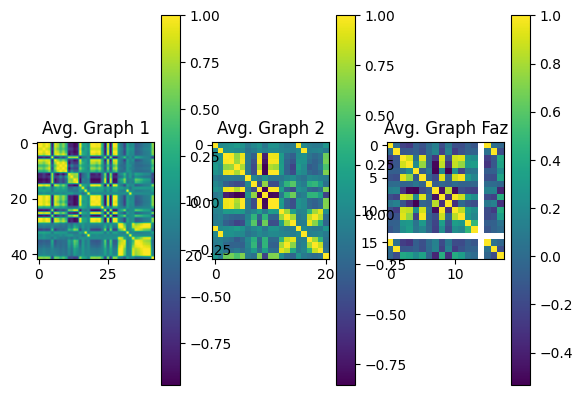

Graph 1
Avg.length 0.6581251
Avg.distance 0.65640175
Avg.curveness 0.5913614
Avg.volume 0.6493412
Avg.avgCrossSection 0.59193826
Avg.minRadiusAvg -0.5277207
Avg.minRadiusStd 0.57996106
Avg.avgRadiusAvg 0.5151825
Avg.avgRadiusStd 0.29792356
Avg.maxRadiusAvg 0.45840576
Avg.maxRadiusStd 0.2388533
Avg.roundnessAvg -0.53788966
Avg.roundnessStd -0.47468147
Avg.node1_degree -0.612505
Avg.node2_degree -0.57361597
Avg.num_voxels 0.6578231
Avg.hasNodeAtSampleBorder 0.2209202
Avg.centroid-0 0.17242181
Avg.centroid-1 -0.086246036
Avg.area 0.6510112
Avg.perimeter 0.6594793
Avg.eccentricity 0.6280039
Avg.equivalent_diameter 0.653127
Avg.orientation 0.31874442
Avg.solidity -0.6238324
Avg.feret_diameter_max 0.6597426
Avg.extent -0.63634545
Avg.axis_major_length 0.6597308
Avg.axis_minor_length 0.64362365
Avg.intensity_max -0.10184365
Avg.intensity_mean -0.1919626
Avg.intensity_min -0.4078167
Avg.centroid_weighted-0 0.17247617
Avg.centroid_weighted-1 -0.08641893
Avg.std -0.056782812
Avg.q5 -0.30261824
A

In [207]:
correlation_matrices = []

corr_graph_1 = None
corr_graph_2 = None

num_samp = len(work_set)

graph_1_corr = torch.zeros((len(work_set), len(features_label_dict["graph_1"])))
graph_2_corr = torch.zeros((len(work_set), len(features_label_dict["graph_2"])))
graph_faz_corr = torch.zeros((len(work_set), len(features_label_dict["faz"])))

label_tensor = torch.zeros((len(work_set), 1))

for i in range(len(work_set)):
    graph_1 = work_set[i]["graph_1"]
    graph_2 = work_set[i]["graph_2"]
    graph_faz = work_set[i]["faz"]

    label_tensor[i] = work_set[i].y
    
    # average the features of all nodes in the graph 
    graph_1_avg = torch.mean(graph_1.x, dim = 0) # torch.quantile(graph_1.x,0.1, dim=0)  #torch.mean(graph_1.x, dim = 0)
    graph_2_avg =torch.mean(graph_2.x, dim = 0) #  torch.quantile(graph_2.x,0.1, dim=0)
    graph_faz_avg = torch.mean(graph_faz.x, dim = 0) #  torch.quantile(graph_faz.x,0.1, dim=0)

    # add averages to the matrix
    graph_1_corr[i] = graph_1_avg
    graph_2_corr[i] = graph_2_avg
    graph_faz_corr[i] = graph_faz_avg

print(label_tensor.shape)
print(graph_1_corr.shape)
print(graph_2_corr.shape)


# calculate the correlation matrix for the average features with the labels
graph_1_corr = torch.cat((graph_1_corr, label_tensor), dim=1)
graph_2_corr = torch.cat((graph_2_corr, label_tensor), dim=1)
graph_faz_corr = torch.cat((graph_faz_corr, label_tensor), dim=1)

corr_graph_1 = torch.corrcoef(graph_1_corr.T)
corr_graph_2 = torch.corrcoef(graph_2_corr.T)
corr_graph_faz = torch.corrcoef(graph_faz_corr.T)

fig, ax = plt.subplots(1,3)
pos = ax[0].imshow(corr_graph_1)
ax[0].set_title("Avg. Graph 1")
# add colorbar
fig.colorbar(pos, ax=ax[0])
pos = ax[1].imshow(corr_graph_2)
ax[1].set_title("Avg. Graph 2")
fig.colorbar(pos, ax=ax[1])
pos = ax[2].imshow(corr_graph_faz)
ax[2].set_title("Avg. Graph Faz")
fig.colorbar(pos, ax=ax[2])


plt.show()
plt.close()

# print correlations of the average features with the labels

corr_graph_1 = corr_graph_1.numpy()
corr_graph_2 = corr_graph_2.numpy()
corr_graph_faz = corr_graph_faz.numpy()

print("Graph 1")
for i in range(len(corr_graph_1)-1):
    print("Avg." + features_label_dict["graph_1"][i], corr_graph_1[i, -1])
print("Graph 2")
print("#"*40)
for i in range(len(corr_graph_2)-1):
    print("Avg." + features_label_dict["graph_2"][i], corr_graph_2[i, -1])
print("Graph Faz")
print("#"*40)
for i in range(len(corr_graph_faz)-1):
    print("Faz " + features_label_dict["faz"][i], corr_graph_faz[i, -1])


print("#"*40)
# print features that are highly correlated among themselves
corr_threshold = 0.99
corr_graph_1_u = np.triu(corr_graph_1, k=1)
corr_graph_2_u = np.triu(corr_graph_2, k=1)

corr_graph_1_sc = np.where(corr_graph_1_u > corr_threshold)
corr_graph_2_sc = np.where(corr_graph_2_u > corr_threshold)

print("Graph 1")
for i in range(len(corr_graph_1_sc[0])):
    print("Avg." + features_label_dict["graph_1"][corr_graph_1_sc[0][i]], "Avg." + features_label_dict["graph_1"][corr_graph_1_sc[1][i]])
    print(f"Correlation Value: {corr_graph_1[corr_graph_1_sc[0][i], corr_graph_1_sc[1][i]]}")

print("Graph 2")
print("#"*40)
for i in range(len(corr_graph_2_sc[0])):
    print("Avg." + features_label_dict["graph_2"][corr_graph_2_sc[0][i]], "Avg." + features_label_dict["graph_2"][corr_graph_2_sc[1][i]])
    print(f"Correlation Value: {corr_graph_2[corr_graph_2_sc[0][i], corr_graph_2_sc[1][i]]}")


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()


# Assuming graph_1_corr is your X array
for feat in range(graph_1_corr.shape[1] - 1):  # -1 because the last column is assumed to be the label
    X = graph_1_corr[:, feat].reshape(-1, 1)  # reshape if necessary
    y = graph_1_corr[:, -1]
    
    model.fit(X, y)
    y_pred = model.predict(X)
    
    mae = mean_absolute_error(y, y_pred)

    # print the feature name 
    
    #print(features_label_dict["graph_1"][feat] + f" MAE for feature {feat}: {mae}")




In [208]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif

# Assuming X is your features and y is your labels
X = graph_1_corr[:, :-1]  # all columns except the last one
y = graph_1_corr[:, -1]  # the last column
f_values, p_values = f_classif(X, y)
#print(f"F-values for each feature: {f_values}")

# print the value together with the feature name
for i in range(len(f_values)):
    print(features_label_dict["graph_1"][i], f_values[i])


# Assuming X is your features and y is your labels
X = graph_2_corr[:, :-1]  # all columns except the last one
y = graph_2_corr[:, -1]  # the last column
f_values, p_values = f_classif(X, y)

# print the value together with the feature name
for i in range(len(f_values)):
    print(features_label_dict["graph_2"][i], f_values[i])


length 80.616486
distance 79.74593
curveness 56.478466
volume 76.70474
avgCrossSection 56.262127
minRadiusAvg 39.739838
minRadiusStd 52.909008
avgRadiusAvg 38.111984
avgRadiusStd 11.024198
maxRadiusAvg 28.398323
maxRadiusStd 7.1857476
roundnessAvg 42.54632
roundnessStd 31.112576
node1_degree 62.716766
node2_degree 52.0
num_voxels 80.48801
hasNodeAtSampleBorder 10.726138
centroid-0 3.744416
centroid-1 1.3321556
area 77.428795
perimeter 80.88386
eccentricity 68.293755
equivalent_diameter 77.643326
orientation 11.967886
solidity 67.70297
feret_diameter_max 81.08281
extent 71.062645
axis_major_length 81.25438
axis_minor_length 73.69659
intensity_max 1.7029094
intensity_mean 4.6373234
intensity_min 21.098783
centroid_weighted-0 3.7464979
centroid_weighted-1 1.3216931
std 0.74424994
q5 11.02576
q10 8.859242
q25 6.245232
q75 3.5860608
q90 2.8801734
q95 2.2221706
centroid-0 2.8084824
centroid-1 1.7717519
area 55.22843
perimeter 59.246998
eccentricity 30.594484
equivalent_diameter 74.0538
orien

In [ ]:
from sklearn.feature_selection import f_classif

# Assuming X is your features and y is your labels
X = graph_1_corr[:, :-1]  # all columns except the last one
y = graph_1_corr[:, -1]  # the last column

f_values, p_values = f_classif(X, y)

print(f"F-values for each feature: {f_values}")

In [209]:
# fit an LDAModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
X_vessel = graph_1_corr[:, :-1]  # all columns except the last one
y = graph_1_corr[:, -1]  # the last column

X_void = graph_2_corr[:, :-1]  # all columns except the last one
y = graph_2_corr[:, -1]  # the last column

# combine the features
X = np.concatenate((X_vessel, X_void), axis=1)

# center the features
X = X - np.mean(X, axis=0)
#scale the features
X = X / np.std(X, axis=0)

comb_names = features_label_dict["graph_1"].copy() + features_label_dict["graph_2"].copy()

# remove the centroid features
centroid_idx = comb_names.index("centroid-0")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid-1")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid_weighted-0")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid_weighted-1")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid-0")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid-1")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid_weighted-0")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid_weighted-1")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("degree")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("degree")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("hasNodeAtSampleBorder")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("node1_degree")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("node2_degree")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)


clf.fit(X, y)

# get the coefficients
for i in range(clf.scalings_.shape[1]):
    plt.bar(np.arange(0, clf.scalings_.shape[0]), clf.scalings_[:,i])
    plt.show()

    
   
    
transformed = clf.transform(X)
plt.scatter(transformed[:,0], transformed[:,1], c=y)
# plot the scaling coefficients as arrows on the plot

for i in range(clf.scalings_.shape[0]):
    plt.arrow(0, 0, clf.scalings_[i,0]*1, clf.scalings_[i,1]*1, color = "r", head_width = 0.1)
    plt.text(clf.scalings_[i,0], clf.scalings_[i,1], comb_names[i])
   
# make the plot very large
plt.figure(figsize=(20,20))

# plt.bar(np.arange(0, clf.coef_.T[:,0].shape[0]), clf.coef_.T[:,1])

# print the feature scalins with the feature names
for i in range(clf.scalings_.shape[0]):
    print(comb_names[i], clf.scalings_[i,0], clf.scalings_[i,1])

ValueError: 'degree' is not in list

In [ ]:
included_features = {"graph_1": ["length", "distance", "node2_degree", "area", "perimeter", "avgRadiusAvg", "intensity_mean", "q90", "q10"],
                      "graph_2":["area", "perimeter", "axis_major_length", "axis_minor_length", "intensity_max",  "intensity_mean", "q25", "q75", "std"]}
if faz_node_bool:
    included_features["faz"] = ["area", "perimeter", "axis_major_length", "axis_minor_length", "intensity_max",  "intensity_mean", "q25", "q75", "std"]

# create the eliminate features dict, based on the included features
eliminate_features = {}
for key in features_label_dict.keys():
    eliminate_features[key] = []
    for feat in features_label_dict[key]:
        if feat not in included_features[key]:
            eliminate_features[key].append(feat)



In [226]:
X.shape

(211, 37)

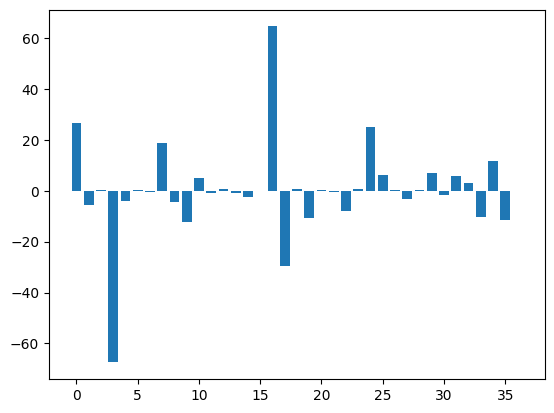

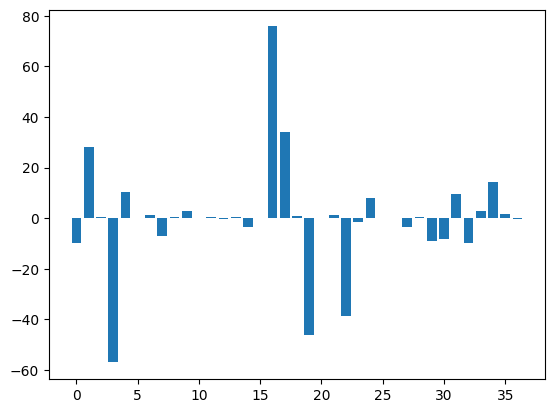

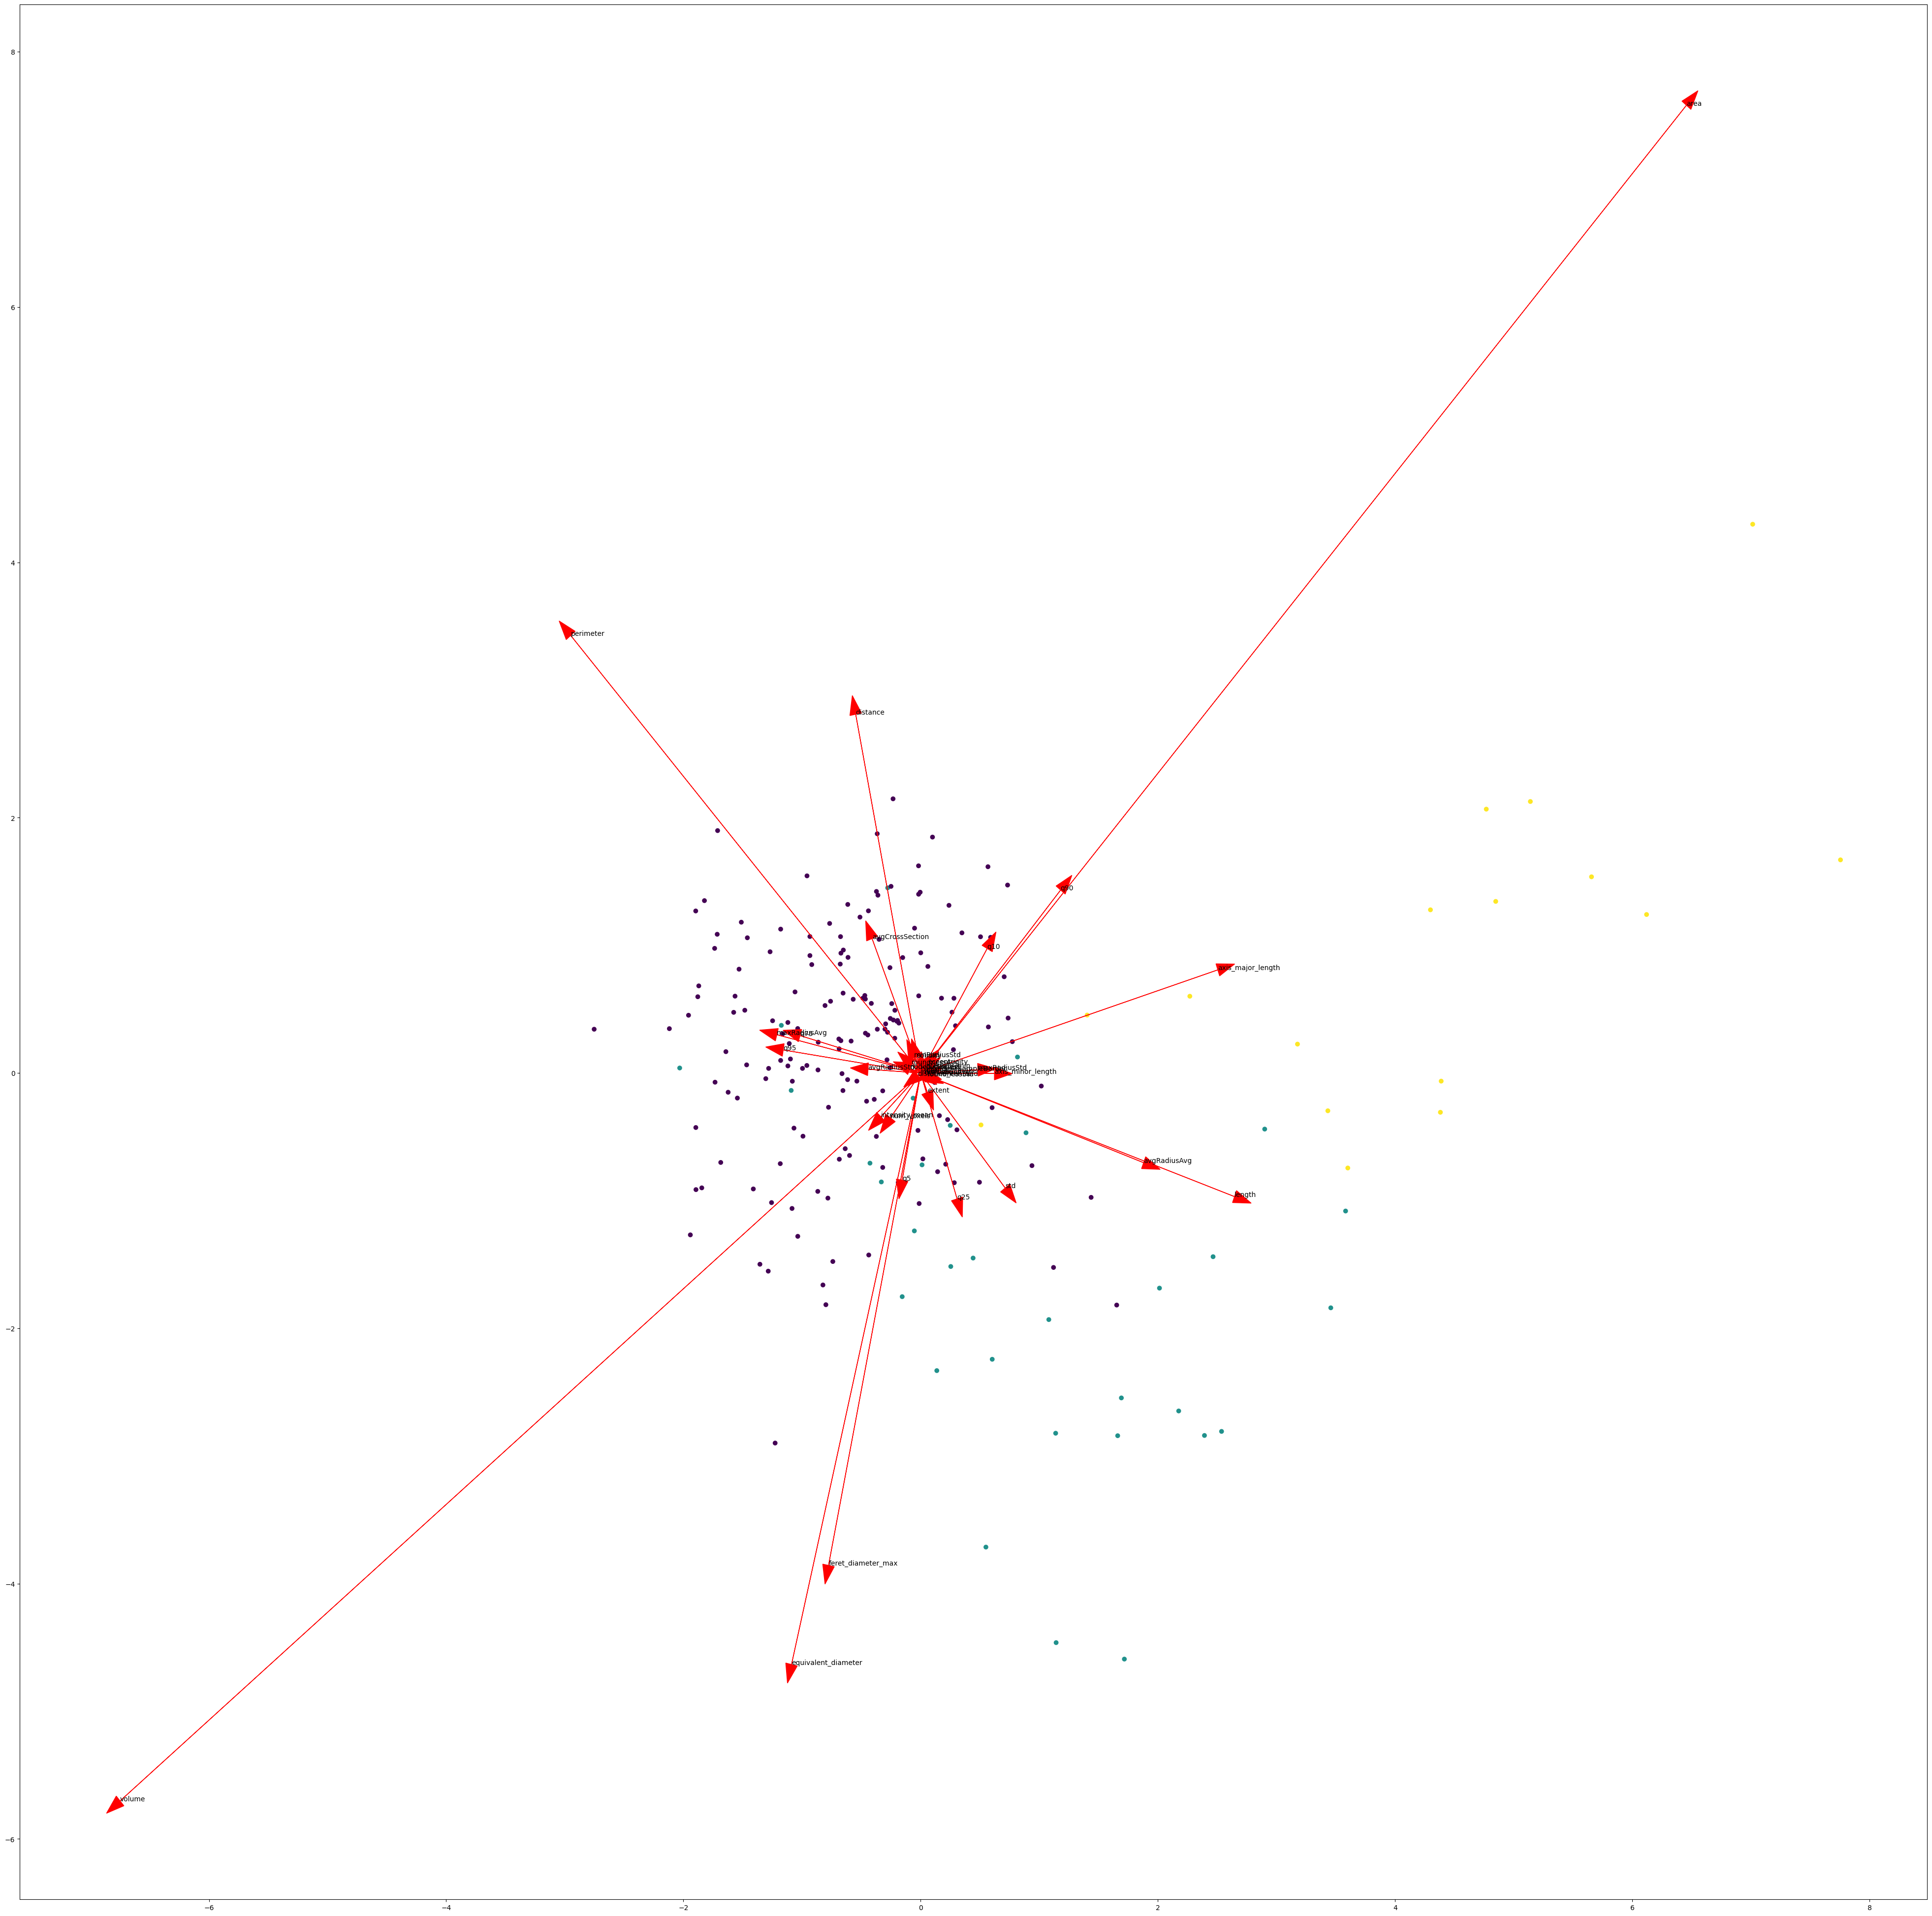

length 26.452314 -9.678873
distance -5.4795313 28.09966
curveness 0.44740593 0.32810724
volume -67.49099 -57.018703
avgCrossSection -4.0984235 10.530991
minRadiusAvg 0.10915635 -0.07264294
minRadiusStd -0.5653848 1.2561107
avgRadiusAvg 18.7878 -7.0226574
avgRadiusStd -4.4404483 0.29806066
maxRadiusAvg -12.127575 3.0019069
maxRadiusStd 4.81972 0.25696325
roundnessAvg -0.7936043 0.67583877
roundnessStd 0.55102676 -0.23607045
node1_degree -0.9144043 0.34975764
num_voxels -2.548903 -3.5107691
hasNodeAtSampleBorder 0.007051905 0.17251238
area 64.548386 75.80935
perimeter -29.503756 34.27794
eccentricity 0.5952027 0.71389
equivalent_diameter -10.890499 -46.329494
orientation 0.32258144 -0.091660164
solidity -0.35973084 1.2470348
feret_diameter_max -7.7706385 -38.56624
extent 0.5617471 -1.5059545
axis_major_length 25.042465 8.080716
axis_minor_length 6.214858 -0.03649104
intensity_max 0.35949078 0.07123061
intensity_mean -3.355001 -3.423151
intensity_min 0.3372895 0.4427517
std 7.1195636 -9.0

In [214]:
# fit an LDAModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
X_vessel = graph_1_corr[:, :-1]  # all columns except the last one
y = graph_1_corr[:, -1]  # the last column

X = np.array(X_vessel)
# create new feature, distance from the centroid

# get the position of centroid-0 and centroid-1
centroid_0_idx = features_label_dict["graph_1"].index("centroid-0")
centroid_1_idx = features_label_dict["graph_1"].index("centroid-1")
# calculate the distance to the point 600, 600
dist = np.sqrt((X[:,centroid_0_idx] - 600)**2 + (X[:,centroid_1_idx] - 600)**2)
# add the distance to the features
X = np.concatenate((X, dist.reshape(-1,1)), axis=1)


# center the features
X = X - np.mean(X, axis=0)
#scale the features
X = X / np.std(X, axis=0)

comb_names = features_label_dict["graph_1"].copy()
comb_names.append("distance_centroid")
#included_features = ["length", "distance", "node2_degree", "area", "perimeter", "avgRadiusAvg", "intensity_mean", "q90", "q10"]
#eliminate_features = []
#for feat in comb_names:
#    if feat not in included_features:
#        eliminate_features.append(feat)
#
## delete the features
#for feat in eliminate_features:
#    idx = comb_names.index(feat)
#    X = np.delete(X, idx, axis=1)
#    comb_names.pop(idx)

# remove the centroid features
centroid_idx = comb_names.index("centroid-0")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid-1")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid_weighted-0")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("centroid_weighted-1")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)
#centroid_idx = comb_names.index("degree")
#X = np.delete(X, centroid_idx, axis=1)
#comb_names.pop(centroid_idx)
#centroid_idx = comb_names.index("hasNodeAtSampleBorder")
#X = np.delete(X, centroid_idx, axis=1)
#comb_names.pop(centroid_idx)
#centroid_idx = comb_names.index("node1_degree")
#X = np.delete(X, centroid_idx, axis=1)
#comb_names.pop(centroid_idx)
centroid_idx = comb_names.index("node2_degree")
X = np.delete(X, centroid_idx, axis=1)
comb_names.pop(centroid_idx)



clf.fit(X, y)

# get the coefficients
for i in range(clf.scalings_.shape[1]):
    plt.bar(np.arange(0, clf.scalings_.shape[0]), clf.scalings_[:,i])
    plt.show()

    
   
plt.figure(figsize=(50,50))    
transformed = clf.transform(X)
plt.scatter(transformed[:,0], transformed[:,1], c=y)
# plot the scaling coefficients as arrows on the plot

for i in range(clf.scalings_.shape[0]):
    plt.arrow(0, 0, clf.scalings_[i,0]*0.1, clf.scalings_[i,1]*0.1, color = "r", head_width = 0.1)
    plt.text(clf.scalings_[i,0]*0.1, clf.scalings_[i,1]*0.1, comb_names[i])
   

plt.show()

# plt.bar(np.arange(0, clf.coef_.T[:,0].shape[0]), clf.coef_.T[:,1])

# print the feature scalins with the feature names
for i in range(clf.scalings_.shape[0]):
    print(comb_names[i], clf.scalings_[i,0], clf.scalings_[i,1])

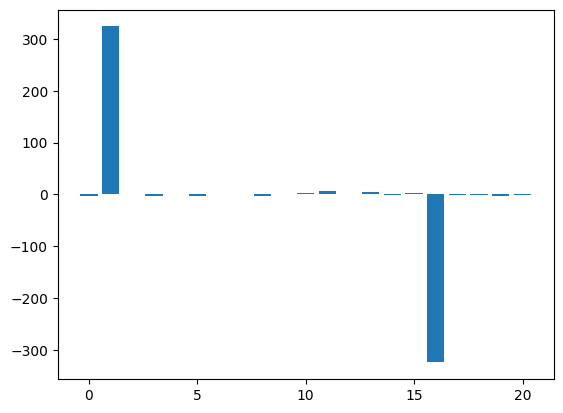

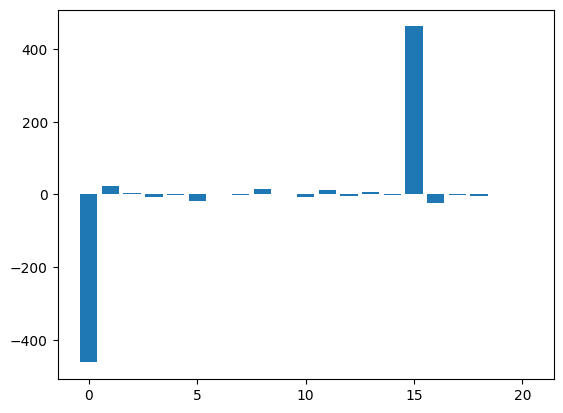

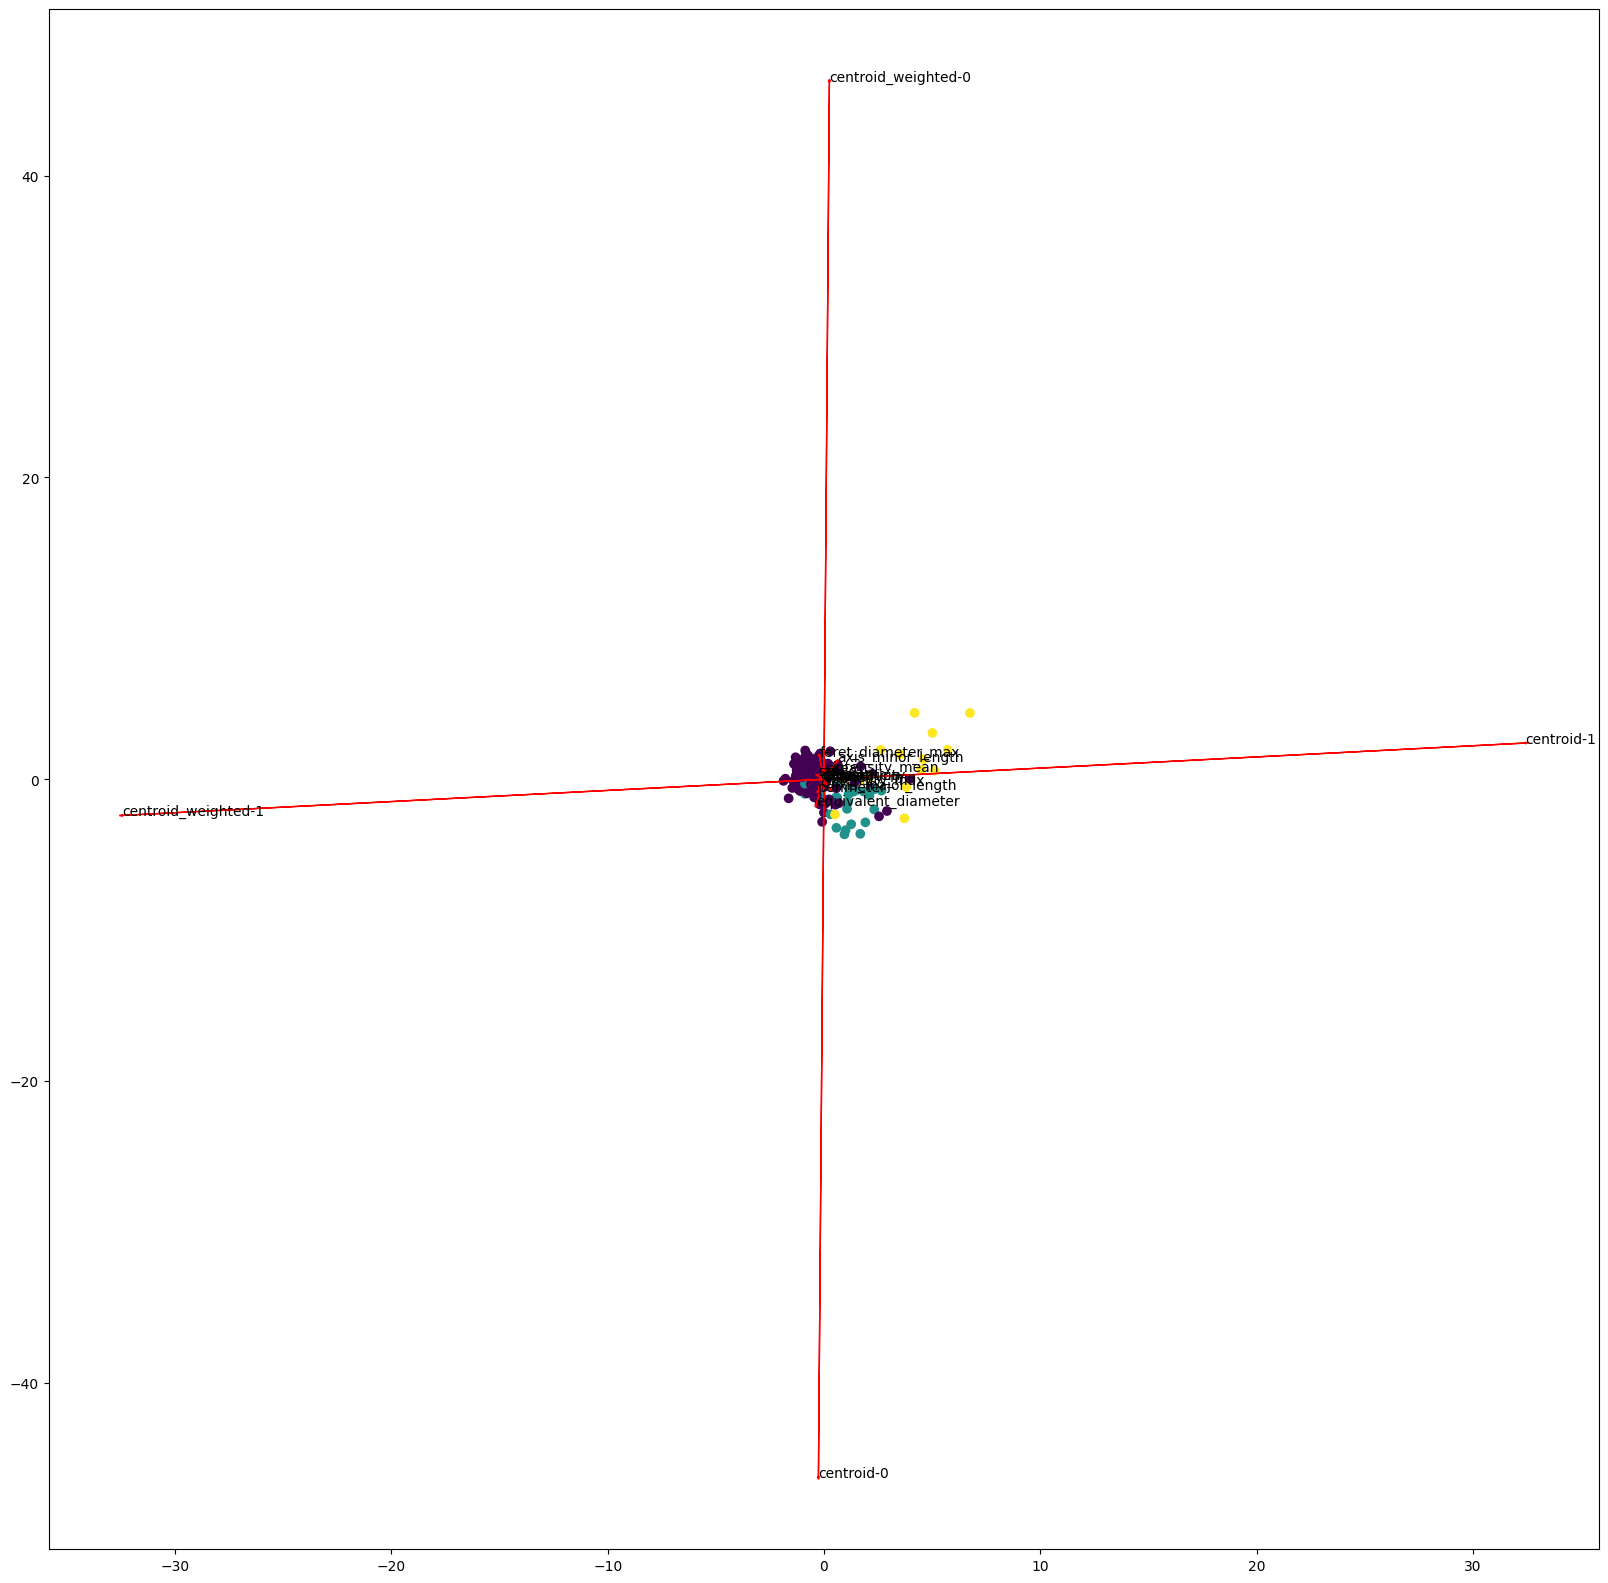

centroid-0 -2.5651553 -462.2881
centroid-1 324.2216 24.010977
area 1.0065453 4.958438
perimeter -2.707968 -7.7416124
eccentricity 0.32982874 -0.13623944
equivalent_diameter -3.6427798 -17.0595
orientation 0.008464023 0.03280487
solidity 0.16750406 -0.53445476
feret_diameter_max -2.1031182 15.214566
extent 0.38259912 0.2178293
axis_major_length 2.942372 -6.687548
axis_minor_length 5.922572 11.792876
intensity_max 1.7170866 -2.9316466
intensity_mean 4.1317687 5.7097793
intensity_min -0.22909784 -0.9075048
centroid_weighted-0 2.50572 462.28915
centroid_weighted-1 -324.33832 -23.937342
q25 -1.8306465 -0.10145345
q75 -1.7936752 -4.394573
std -2.712134 2.3748171
degree -0.7299759 -0.013339647


In [184]:
# fit an LDAModel
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
X_void = graph_2_corr[:, :-1]  # all columns except the last one
y = graph_2_corr[:, -1]  # the last column

X = np.array(X_void)
# center the features
X = X - np.mean(X, axis=0)
#scale the features
X = X / np.std(X, axis=0)

comb_names = features_label_dict["graph_2"].copy()
#included_features = ["area", "perimeter", "axis_major_length", "axis_minor_length", "intensity_max",  "intensity_mean", "q25", "q75", "std"]
#eliminate_features = []
#for feat in comb_names:
#    if feat not in included_features:
#        eliminate_features.append(feat)
#
## delete the features
#for feat in eliminate_features:
#    idx = comb_names.index(feat)
#    X = np.delete(X, idx, axis=1)
#    comb_names.pop(idx)


# remove the centroid features
#centroid_idx = comb_names.index("centroid-0")
#X = np.delete(X, centroid_idx, axis=1)
#comb_names.pop(centroid_idx)
#centroid_idx = comb_names.index("centroid-1")
#X = np.delete(X, centroid_idx, axis=1)
#comb_names.pop(centroid_idx)
#centroid_idx = comb_names.index("centroid_weighted-0")
#X = np.delete(X, centroid_idx, axis=1)
#comb_names.pop(centroid_idx)
#centroid_idx = comb_names.index("centroid_weighted-1")
#X = np.delete(X, centroid_idx, axis=1)
#comb_names.pop(centroid_idx)
#centroid_idx = comb_names.index("intensity_min")
#X = np.delete(X, centroid_idx, axis=1)
#comb_names.pop(centroid_idx)



clf.fit(X, y)

# get the coefficients
for i in range(clf.scalings_.shape[1]):
    plt.bar(np.arange(0, clf.scalings_.shape[0]), clf.scalings_[:,i])
    plt.show()

    
   
# make the plot very large
plt.figure(figsize=(20,20))
transformed = clf.transform(X)
plt.scatter(transformed[:,0], transformed[:,1], c=y)
# plot the scaling coefficients as arrows on the plot

for i in range(clf.scalings_.shape[0]):
    plt.arrow(0, 0, clf.scalings_[i,0]*0.1, clf.scalings_[i,1]*0.1, color = "r", head_width = 0.1)
    plt.text(clf.scalings_[i,0]*0.1, clf.scalings_[i,1]*0.1, comb_names[i])
   
plt.show()

# plt.bar(np.arange(0, clf.coef_.T[:,0].shape[0]), clf.coef_.T[:,1])

# print the feature scalins with the feature names
for i in range(clf.scalings_.shape[0]):
    print(comb_names[i], clf.scalings_[i,0], clf.scalings_[i,1])

In [108]:
# get the large coefficients and print the feature names
#comb_names = features_label_dict["graph_1"] + features_label_dict["graph_2"]
print("Vessel")
for i in range(len(clf.coef_.T[:,0])):
    print(comb_names[i], clf.coef_.T[:,1][i])

Vessel
area -6.2029653
perimeter -2.9129877
eccentricity 0.18087852
equivalent_diameter 8.265437
orientation 0.08550123
solidity 0.43028742
feret_diameter_max 0.6258099
extent -0.36205027
axis_major_length 0.9605265
axis_minor_length 0.25463378
intensity_max 0.45612666
intensity_mean -2.2752764
intensity_min 0.41026807
q25 1.0012661
q75 0.5001035
std 0.34577414
degree -0.15889315


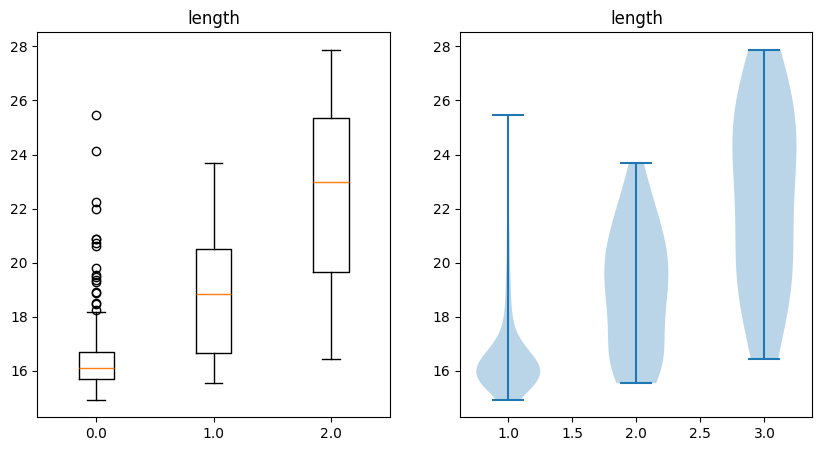

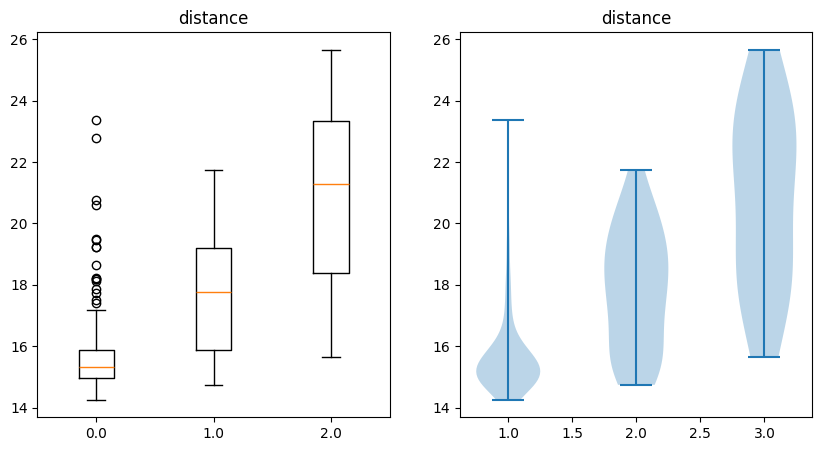

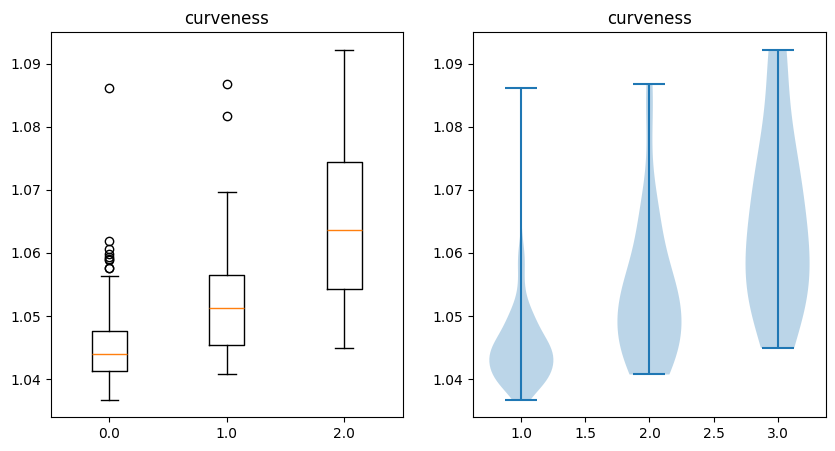

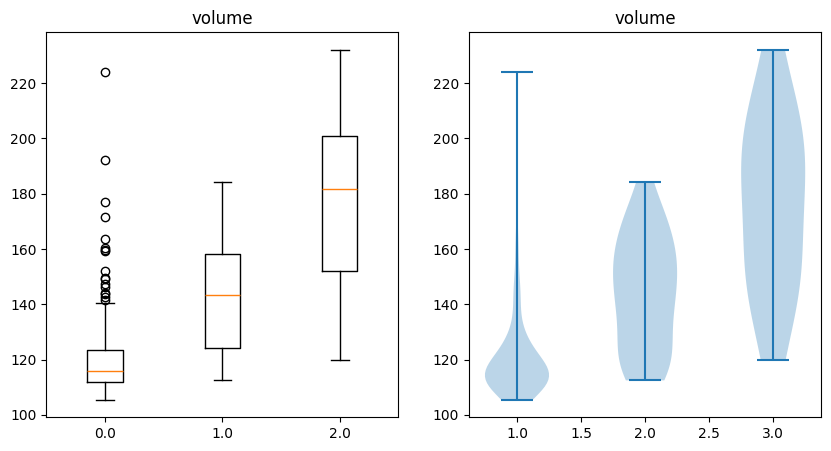

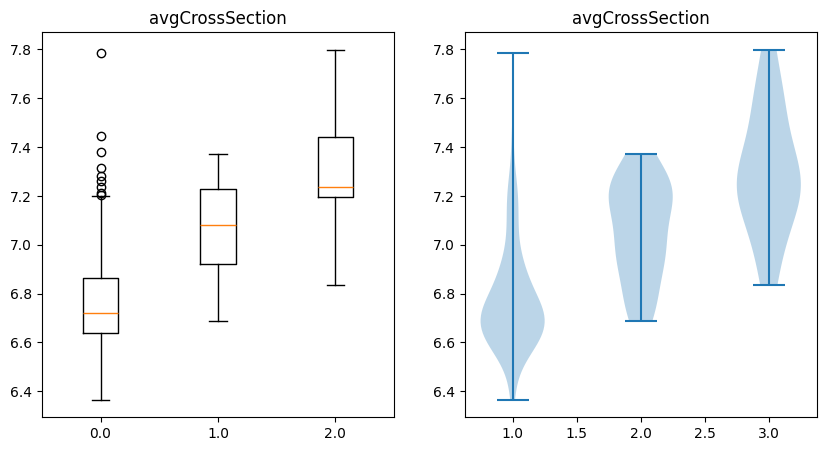

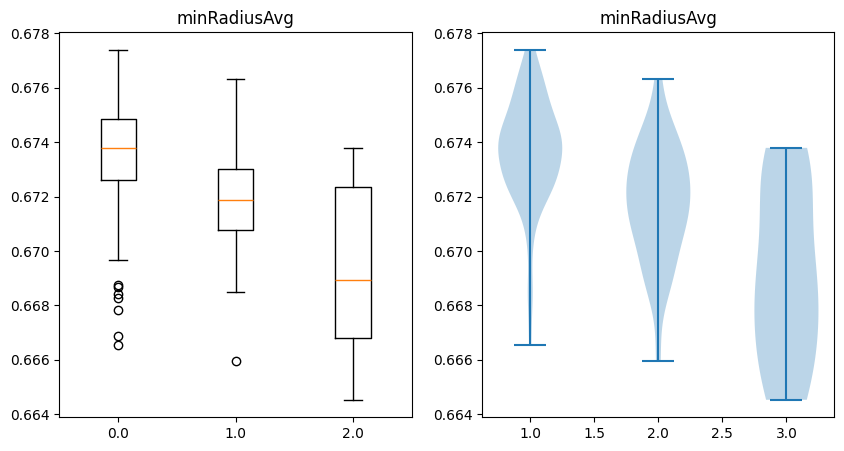

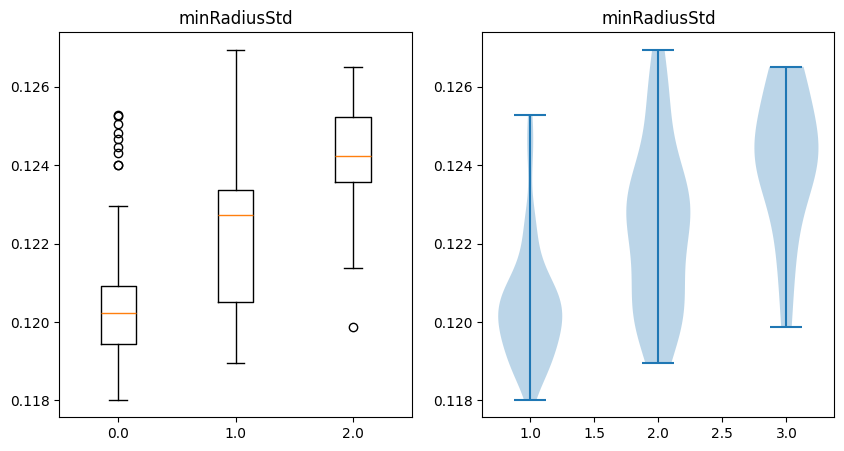

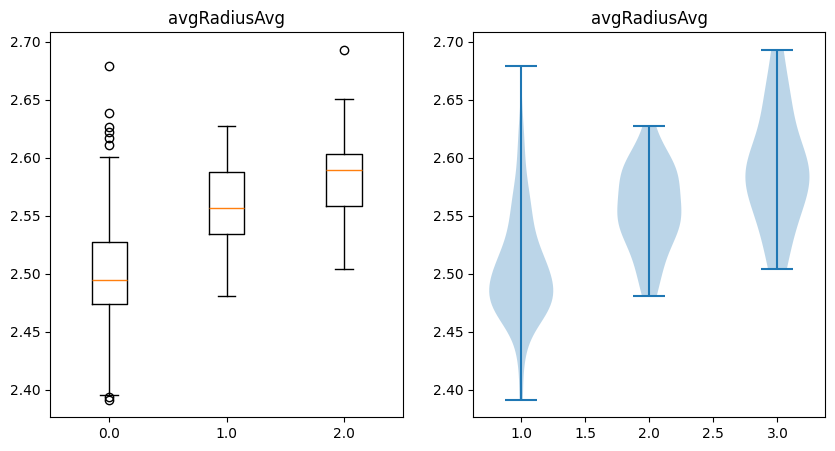

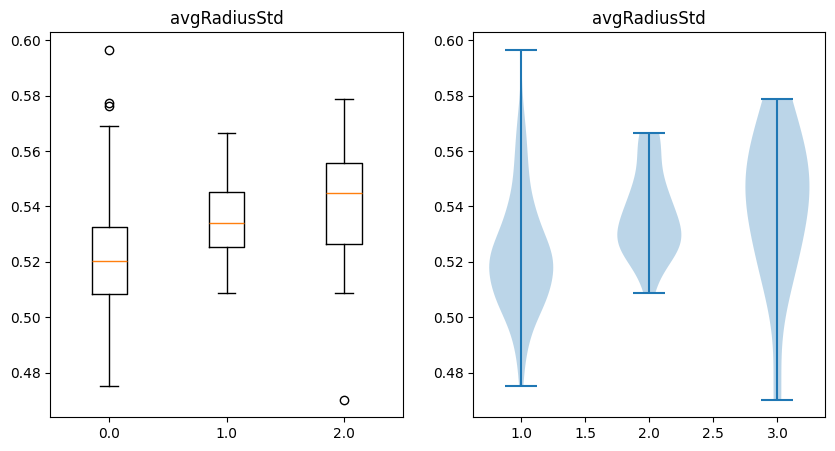

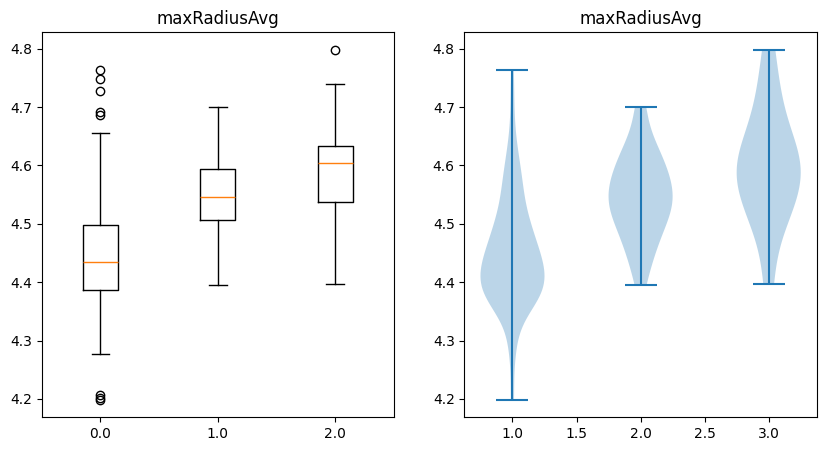

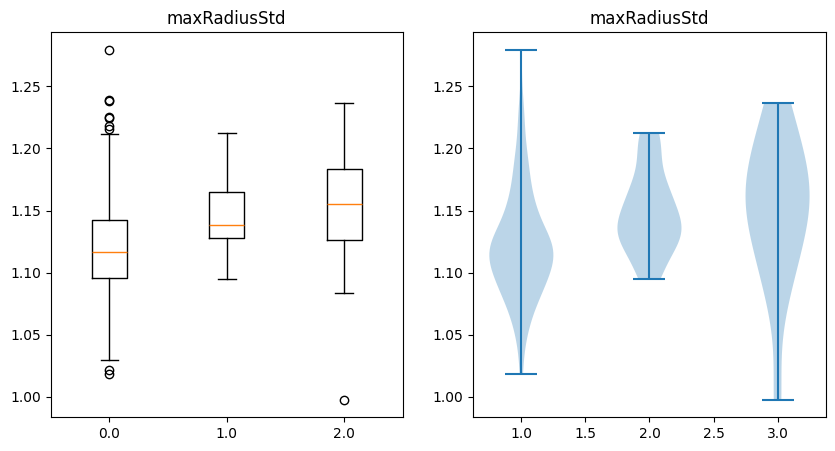

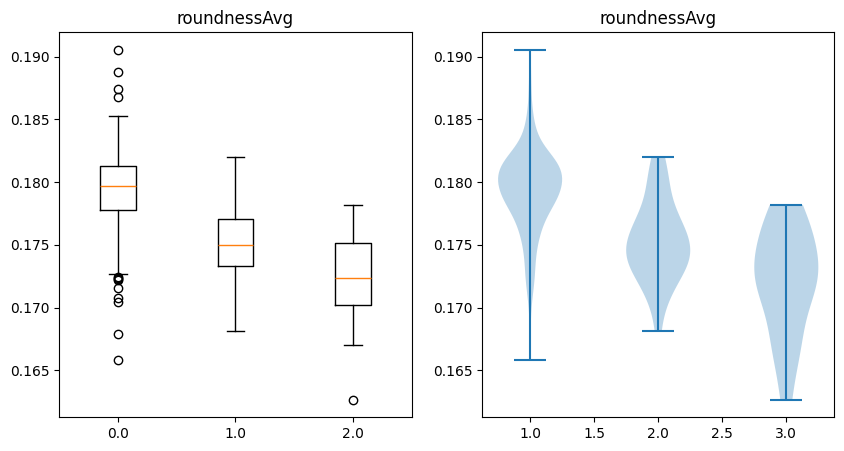

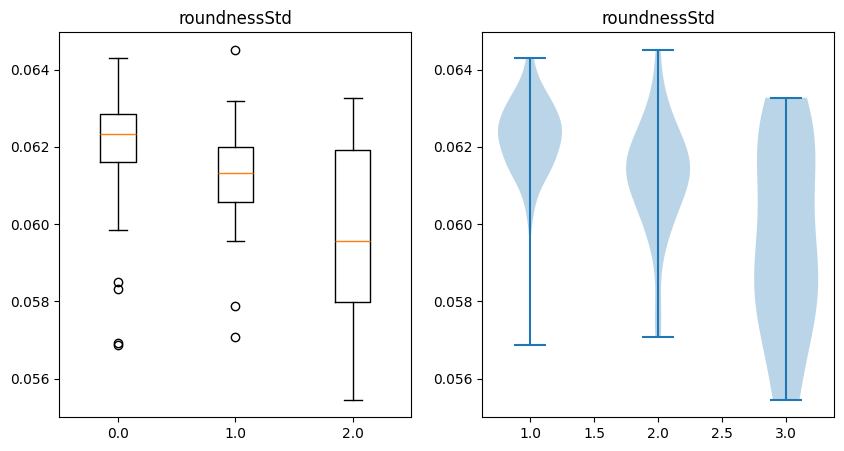

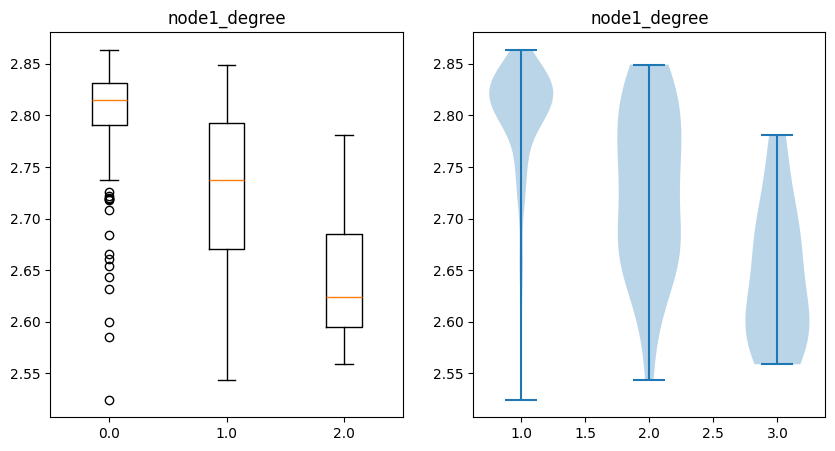

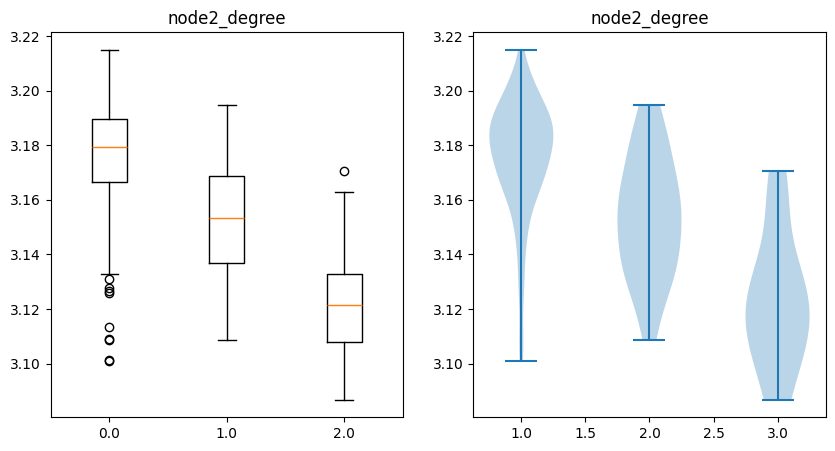

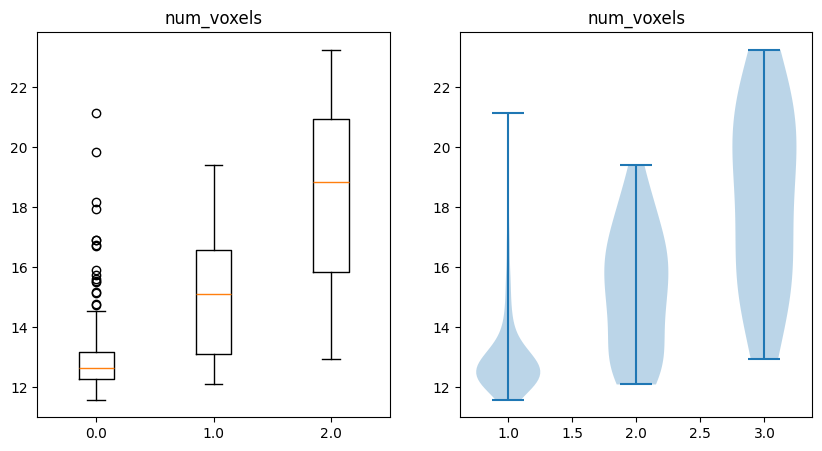

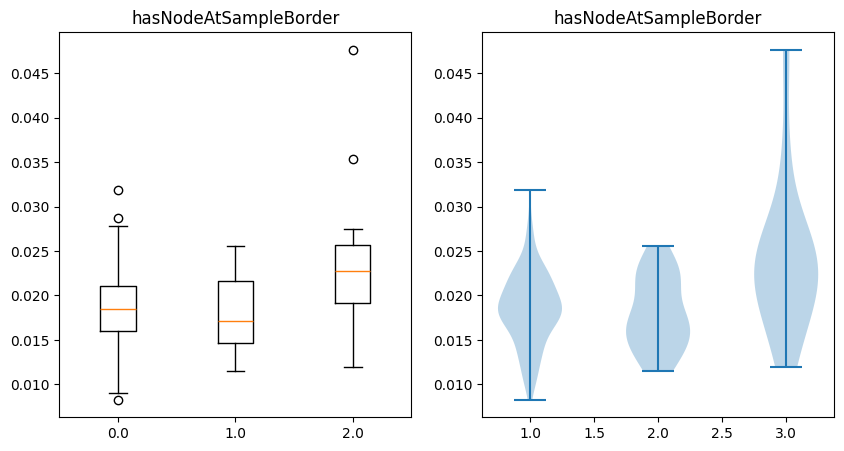

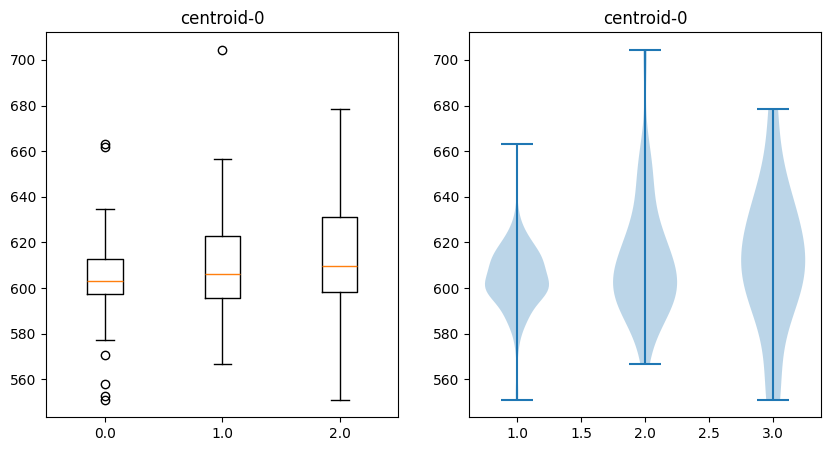

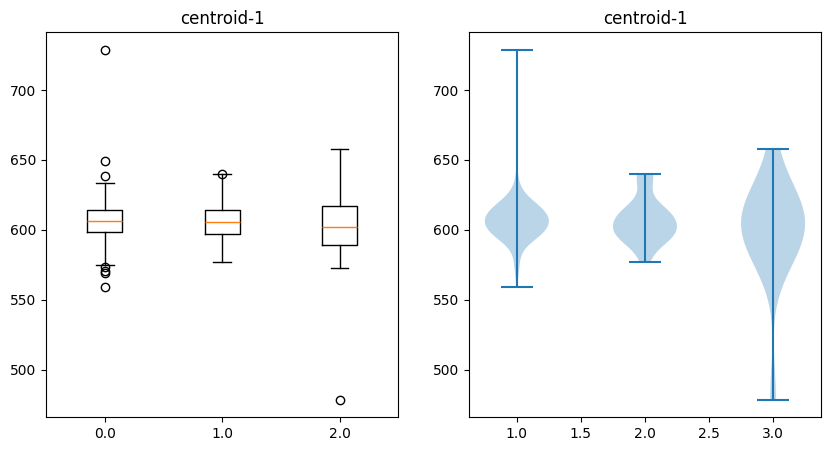

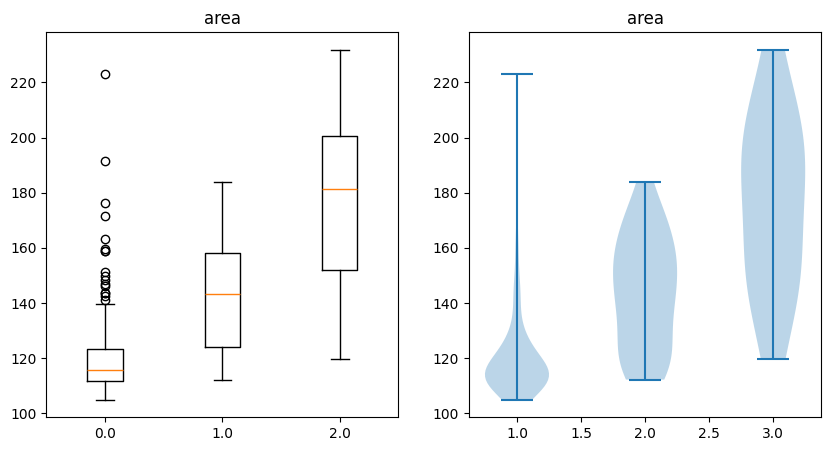

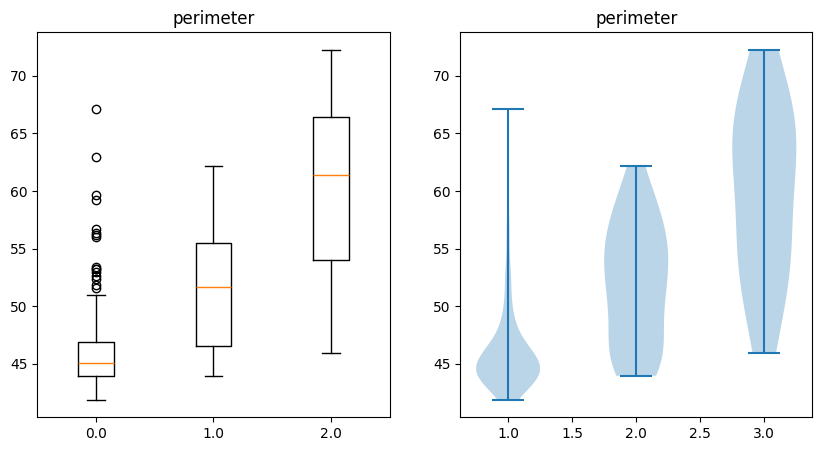

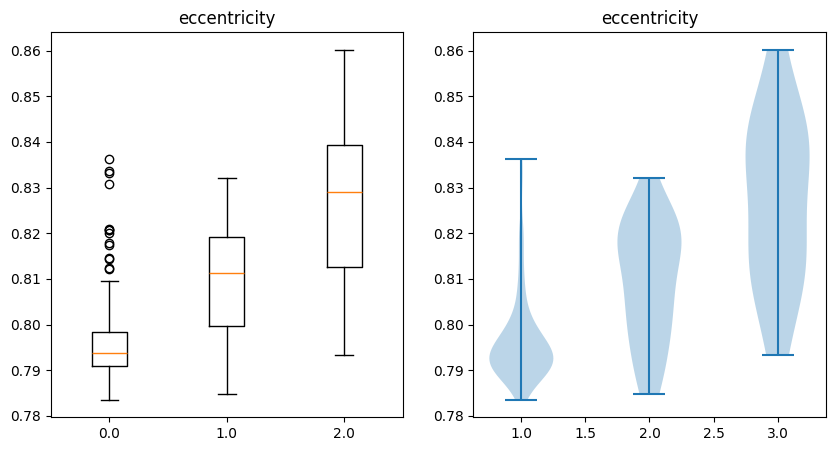

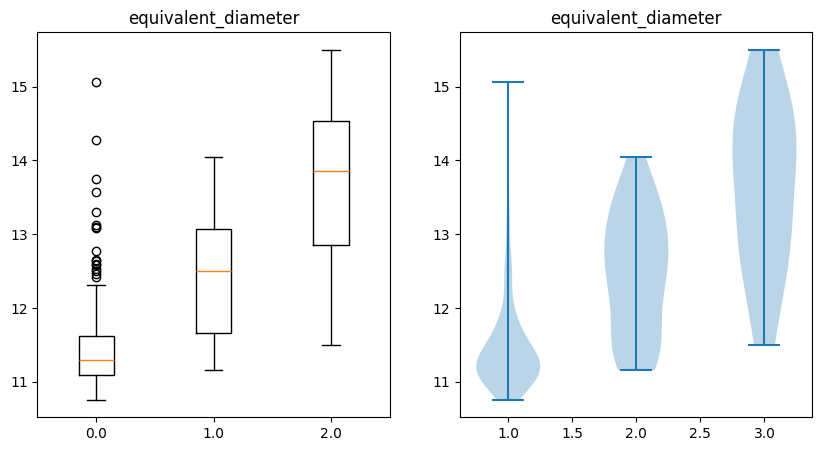

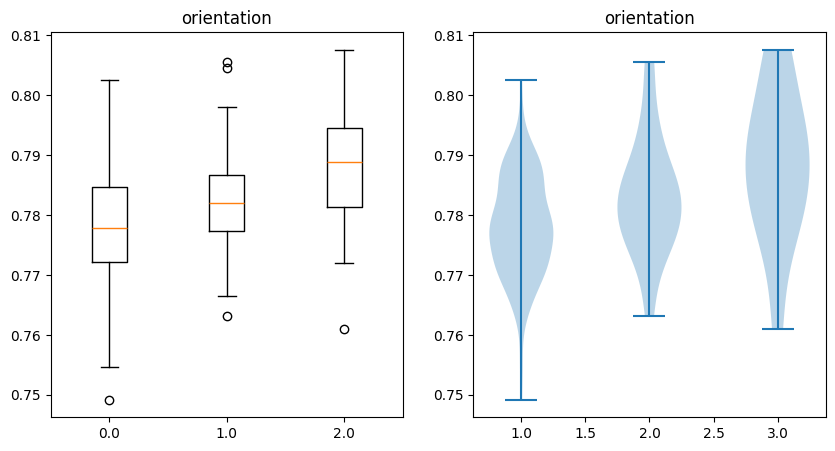

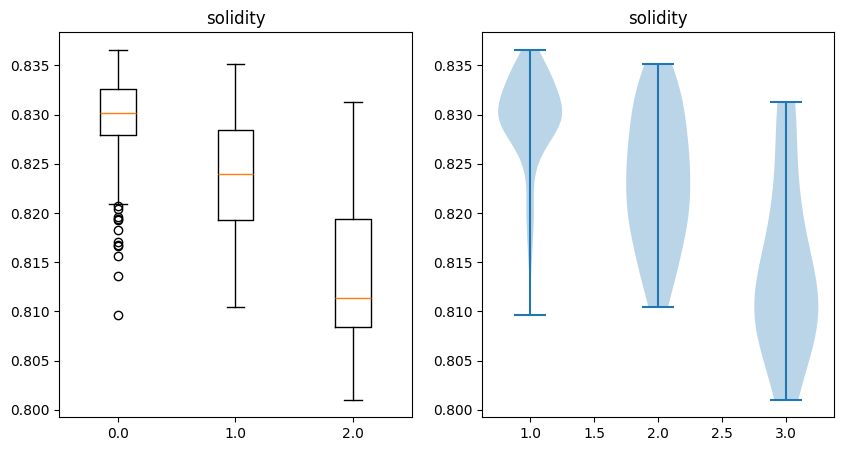

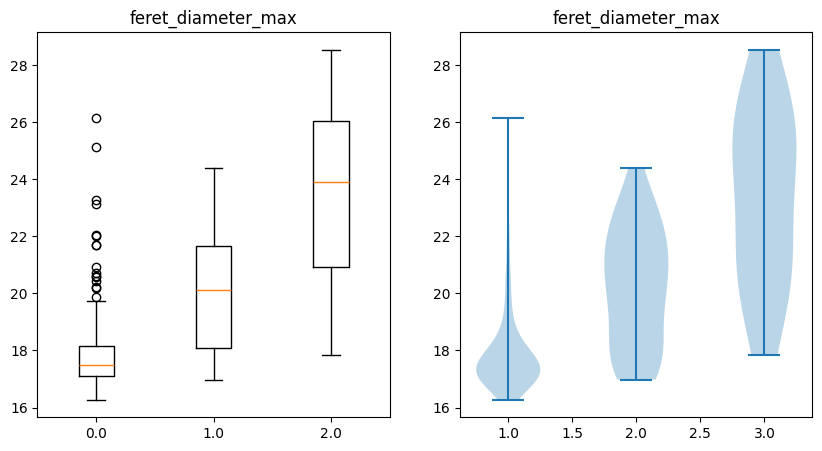

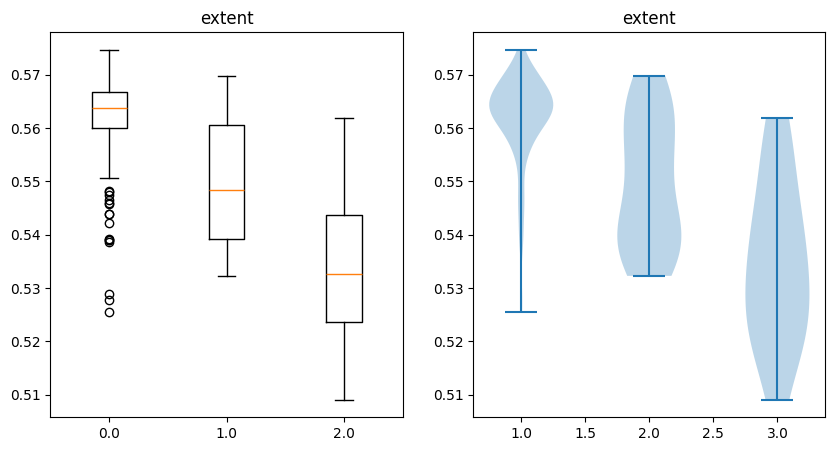

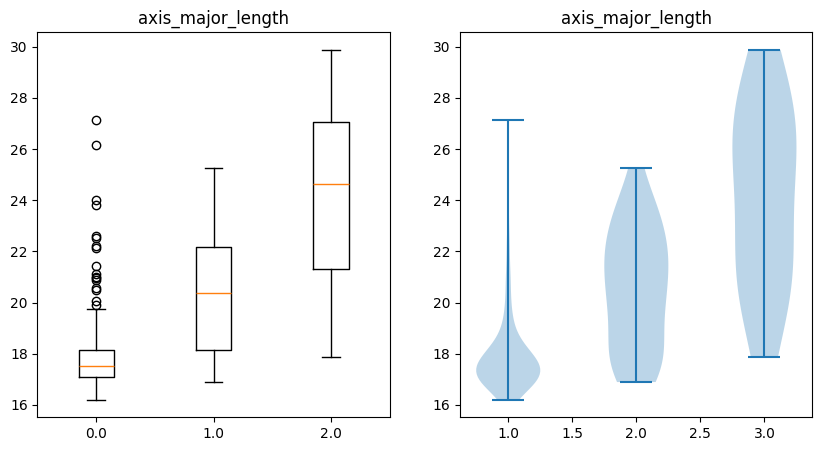

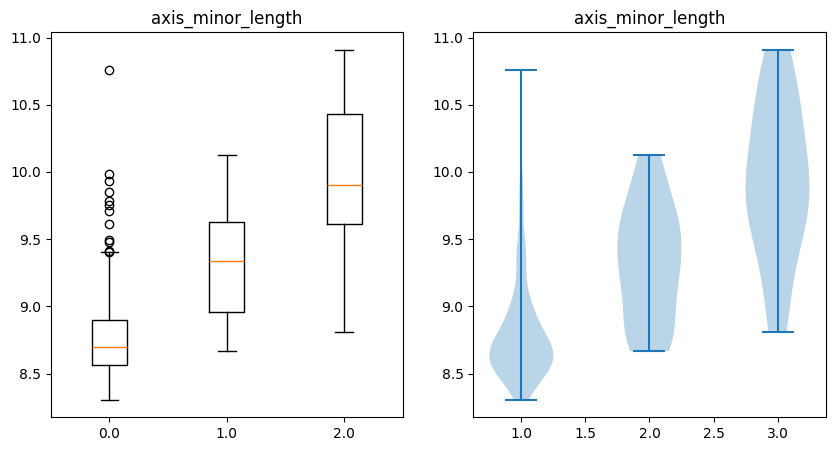

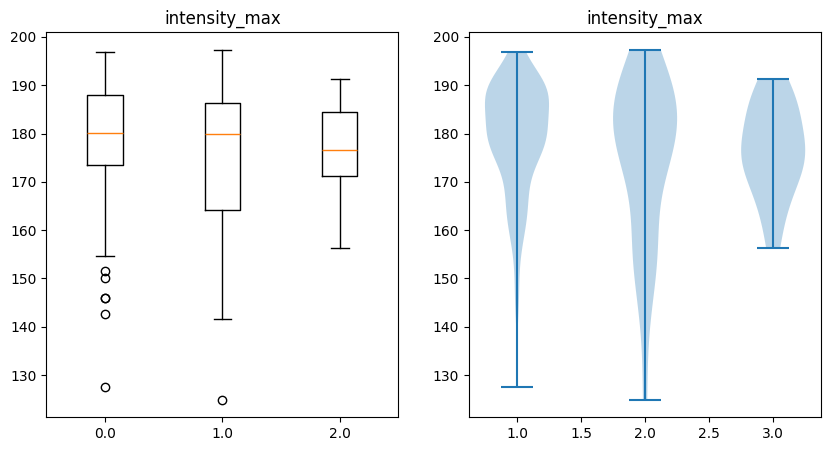

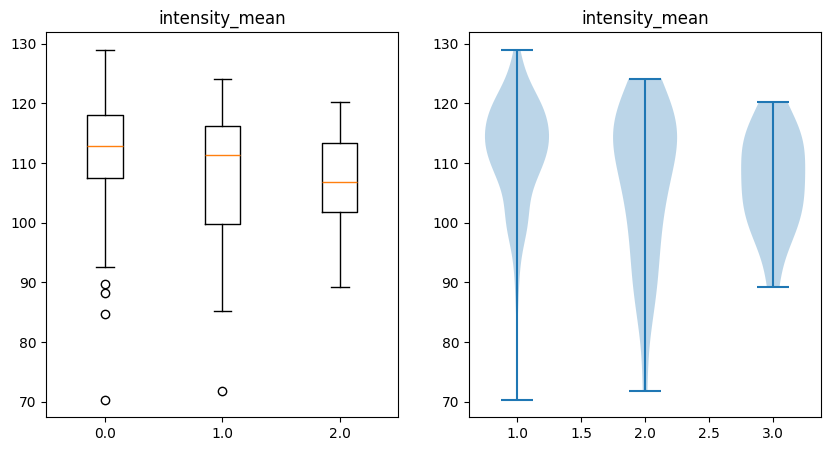

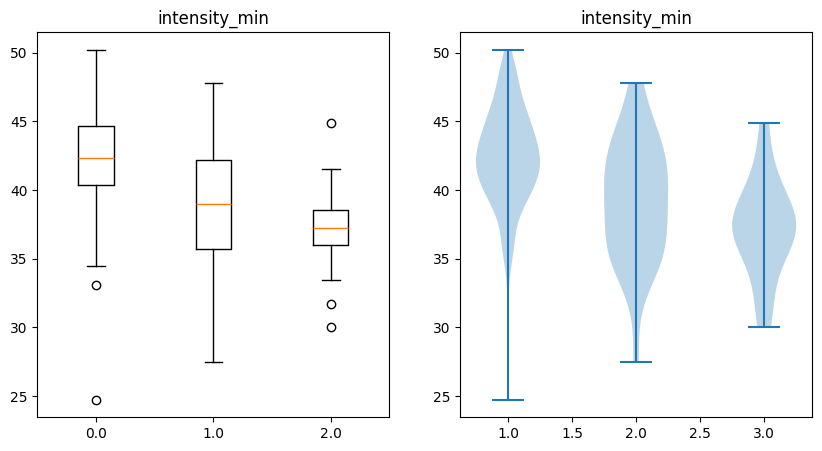

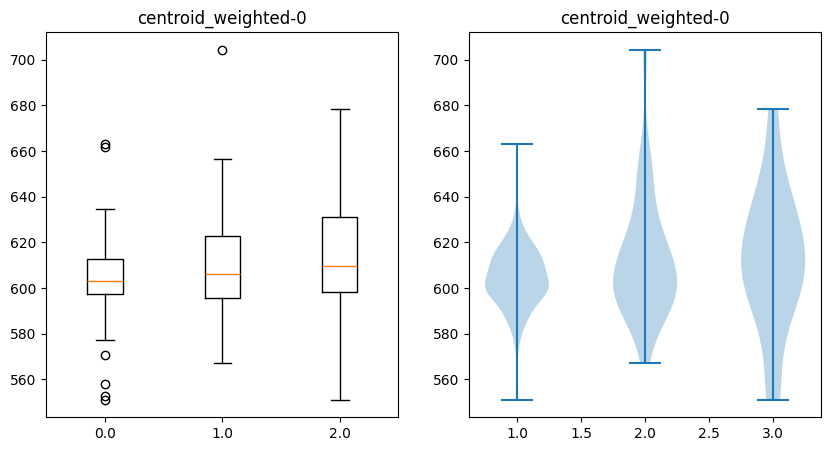

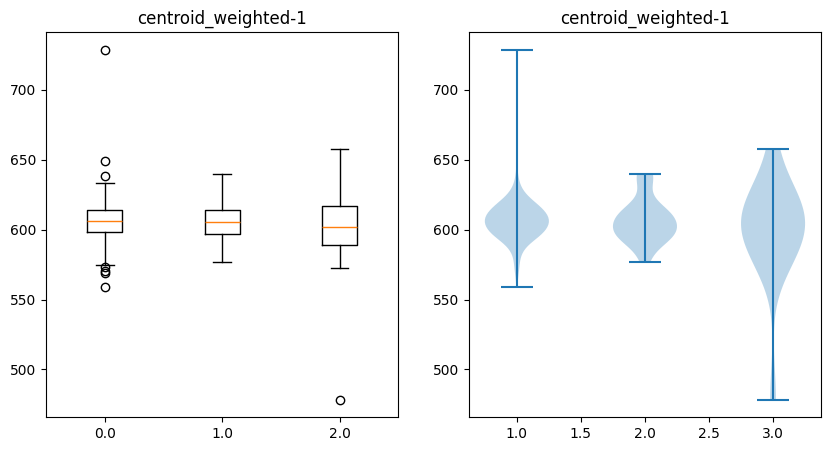

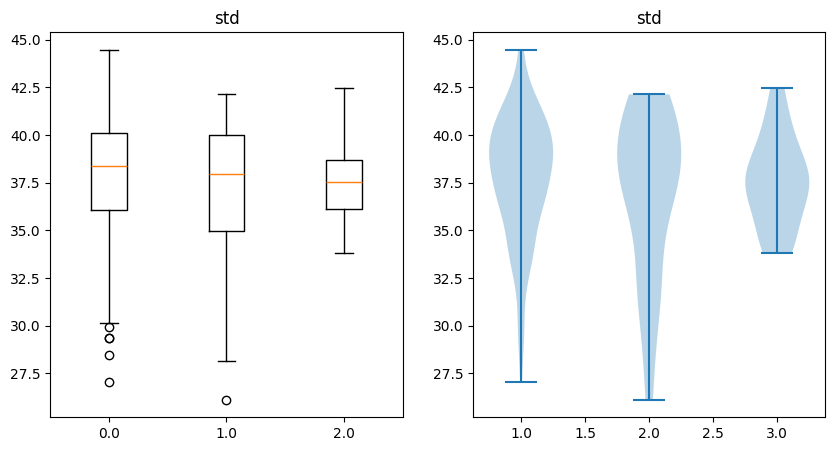

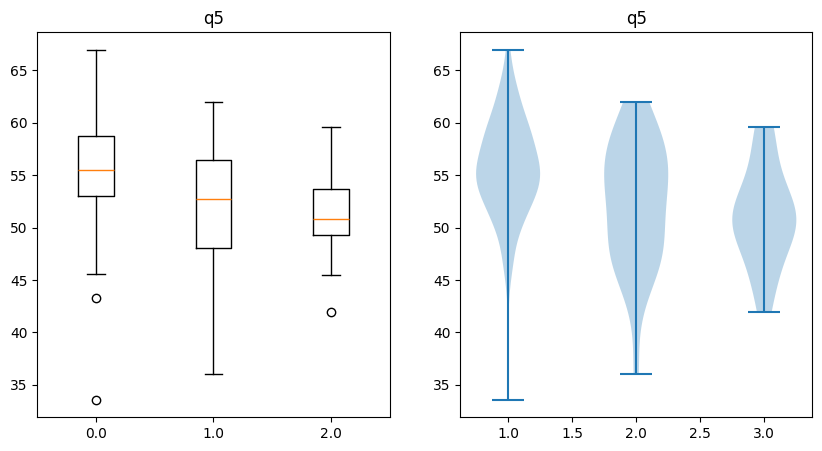

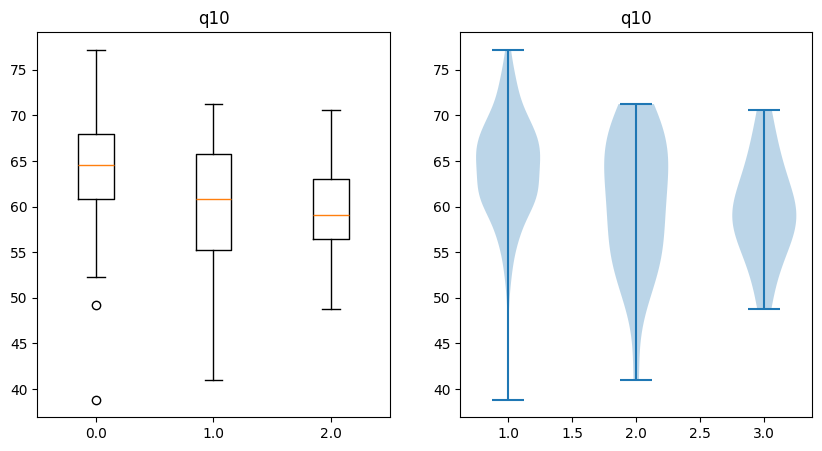

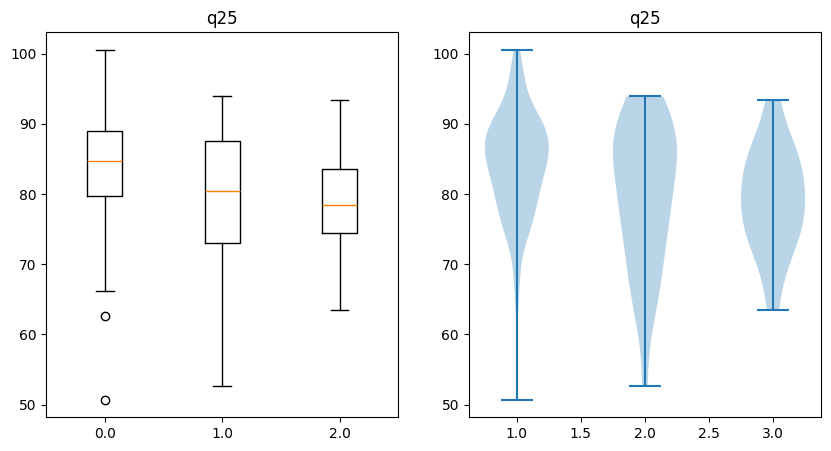

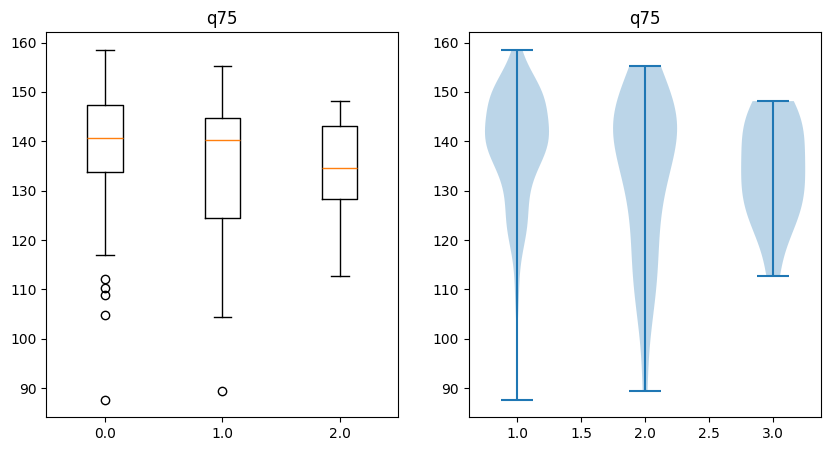

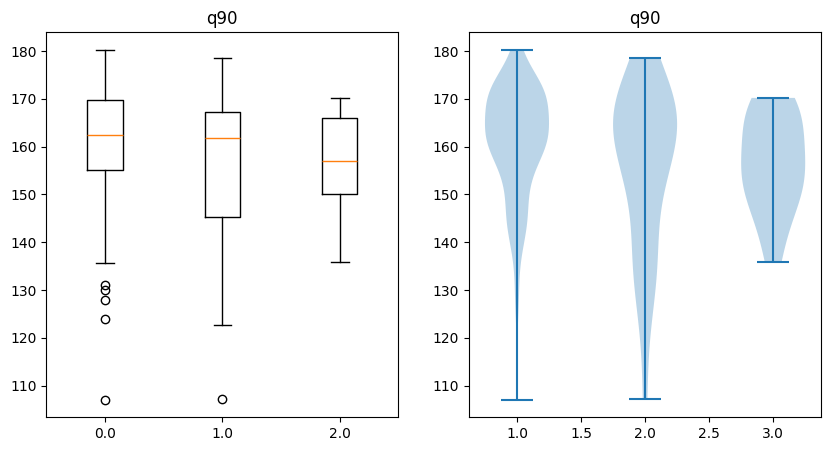

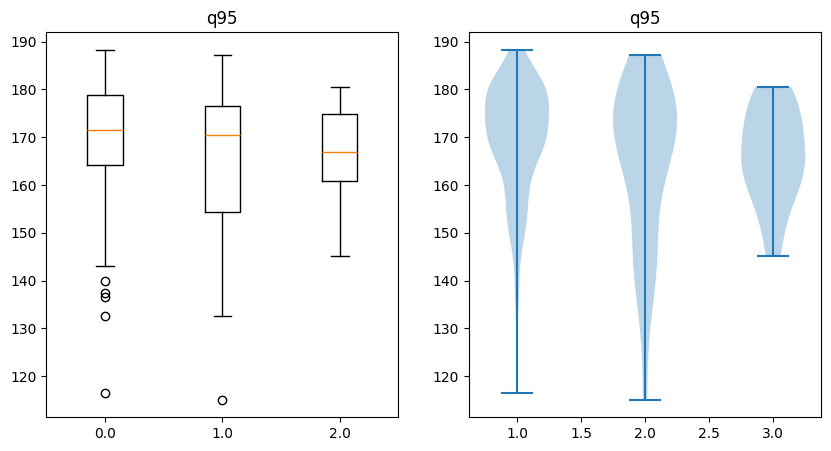

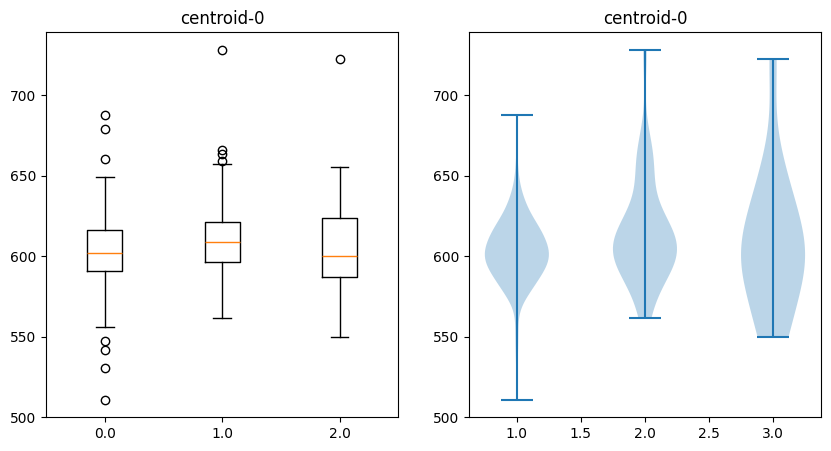

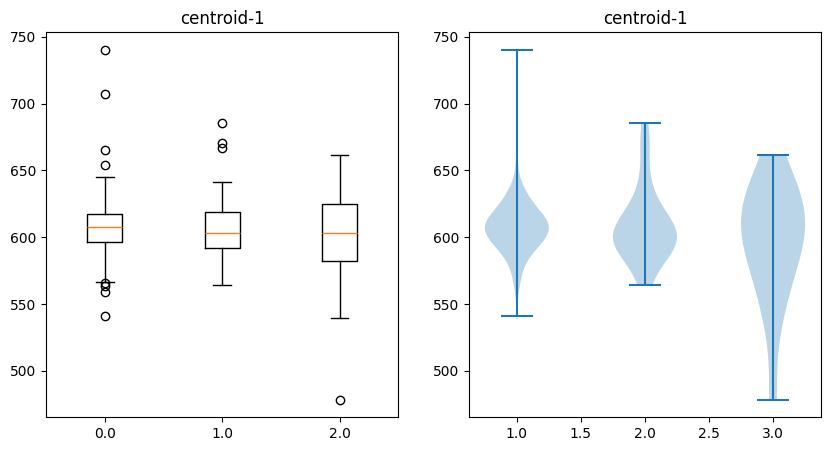

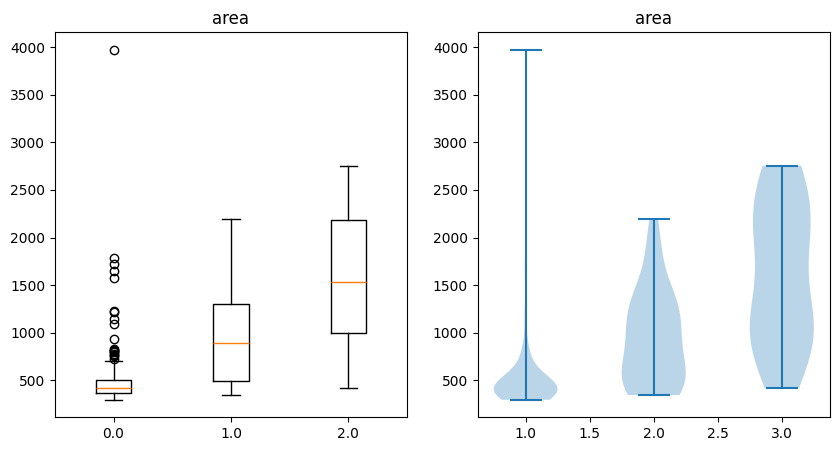

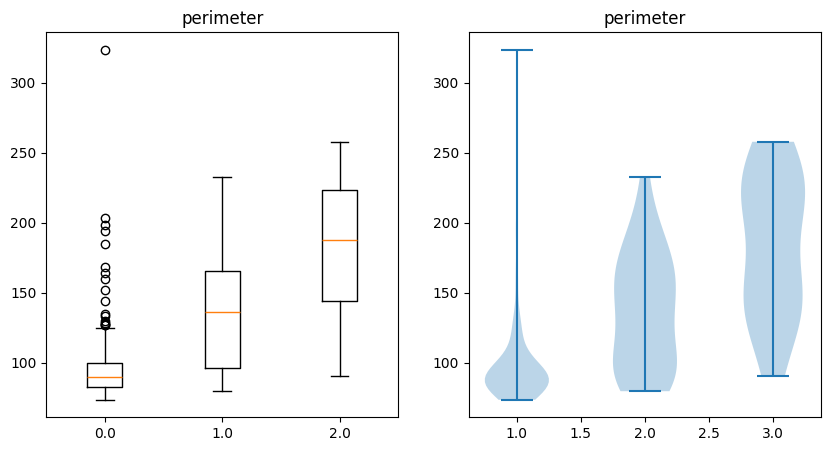

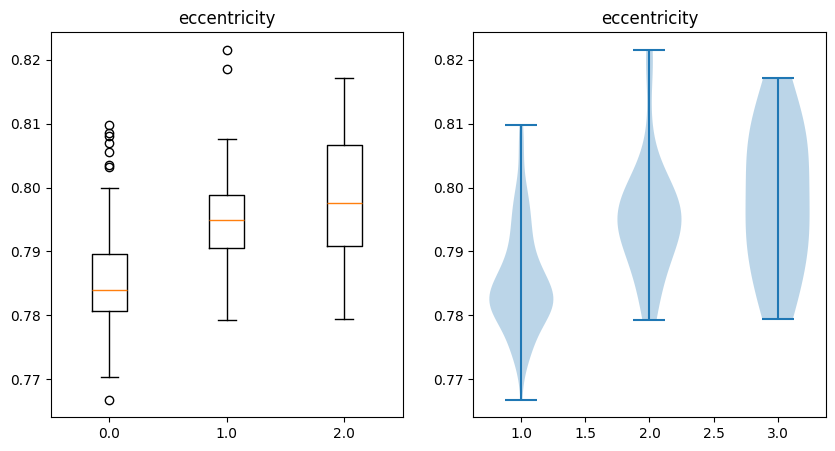

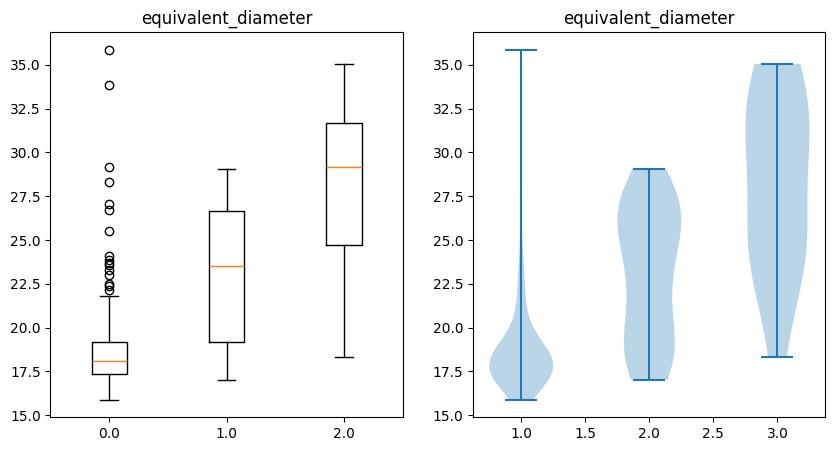

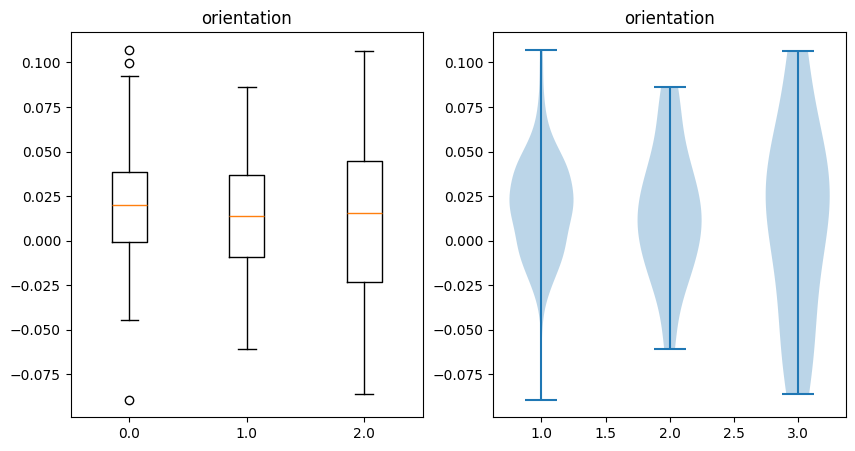

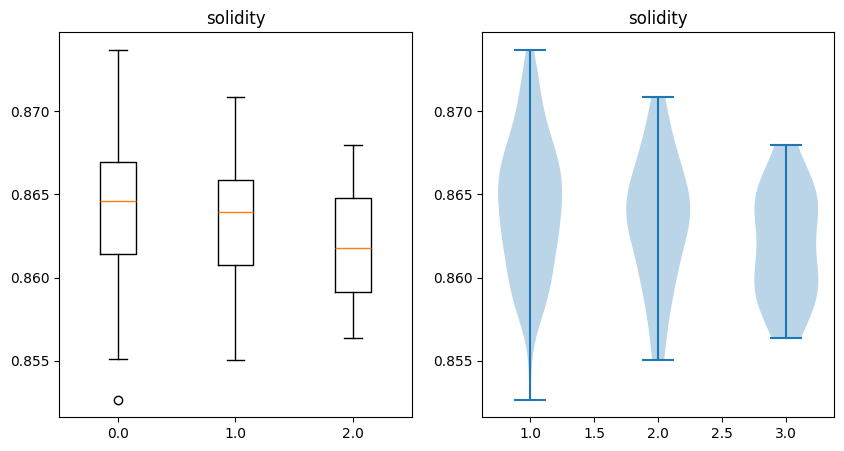

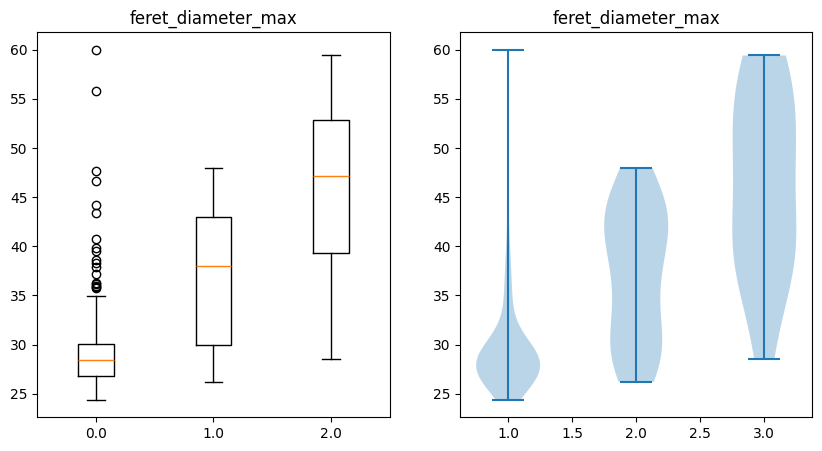

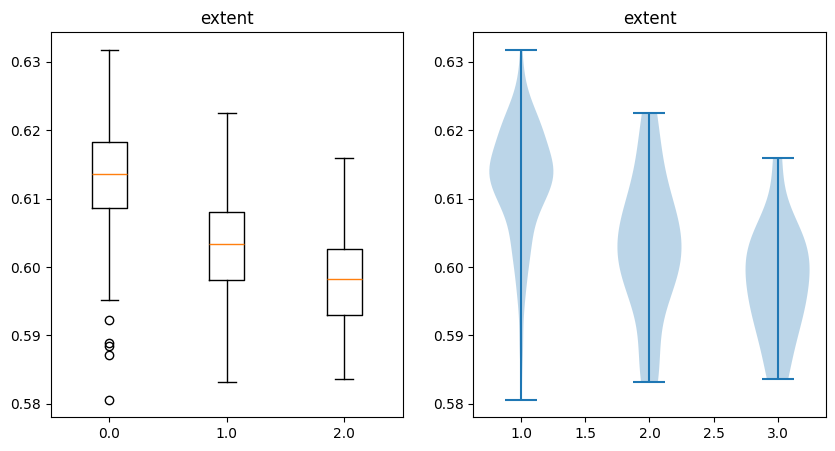

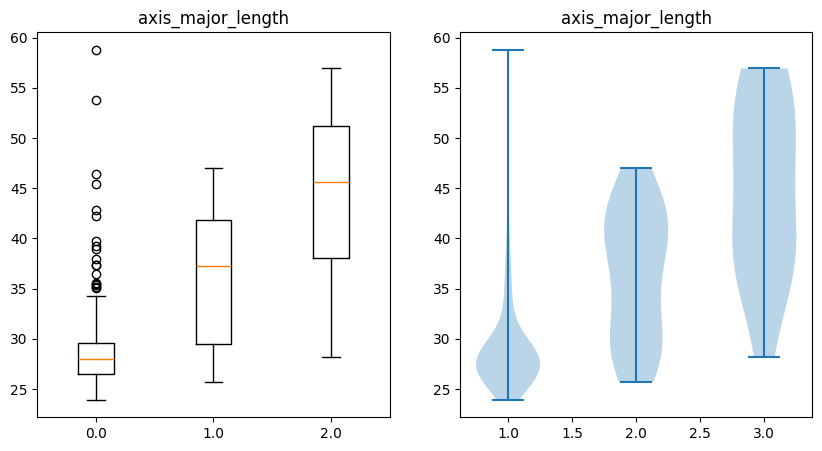

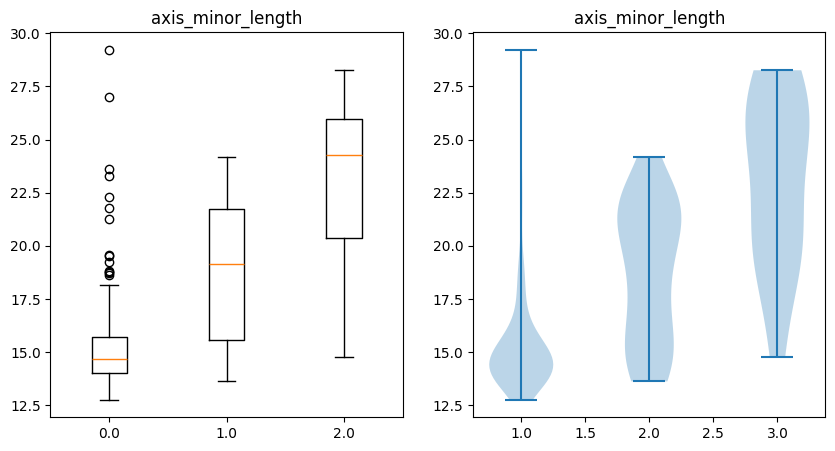

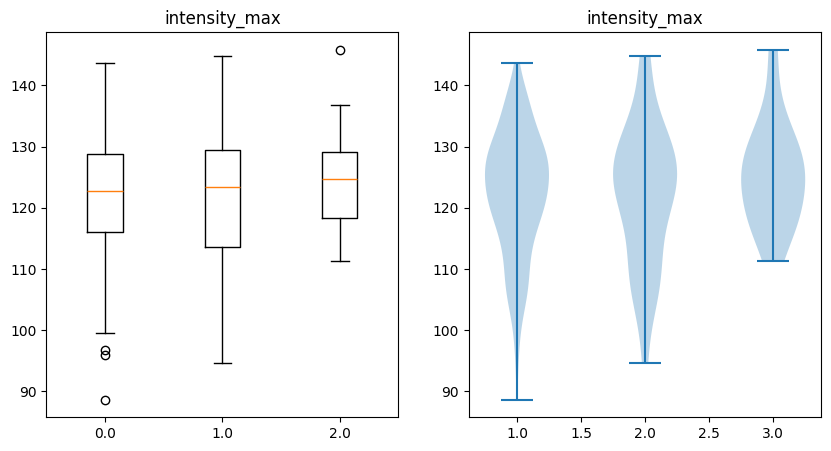

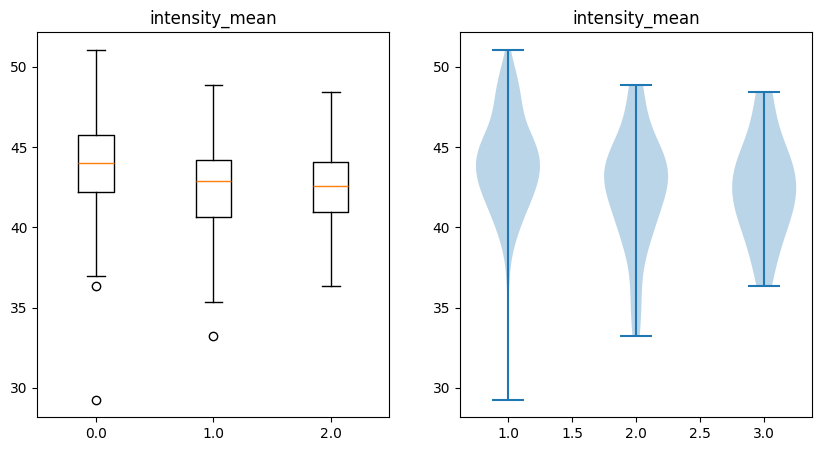

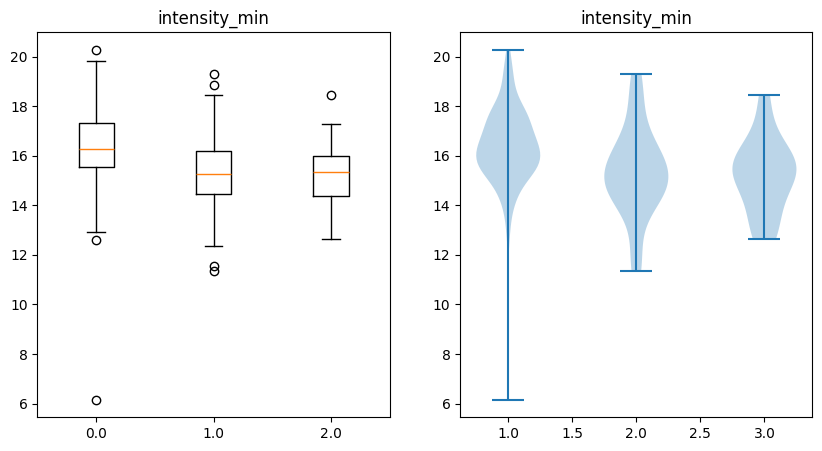

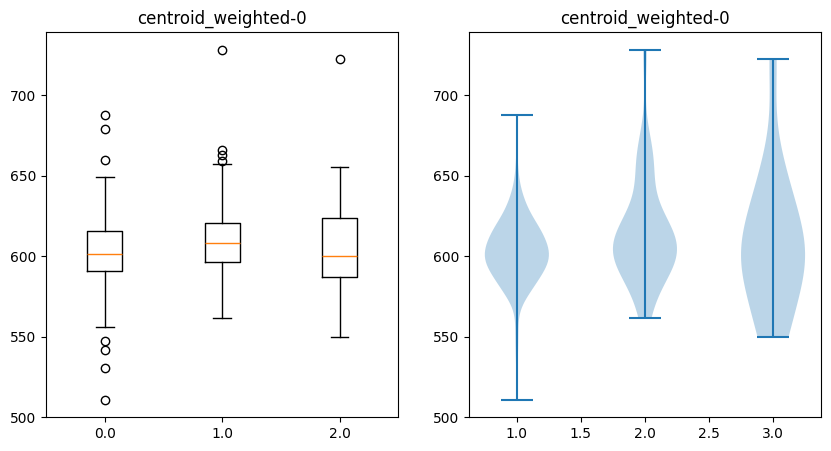

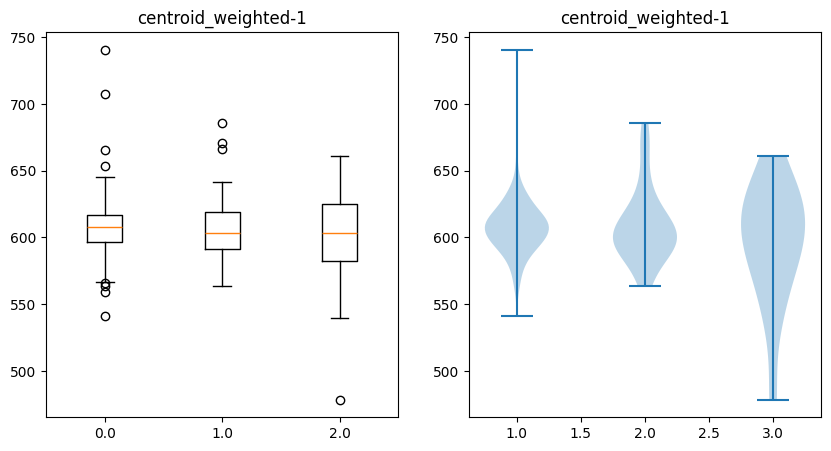

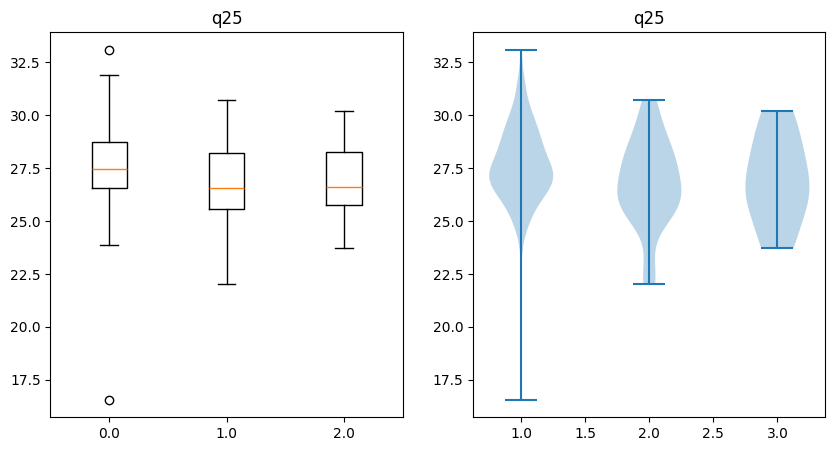

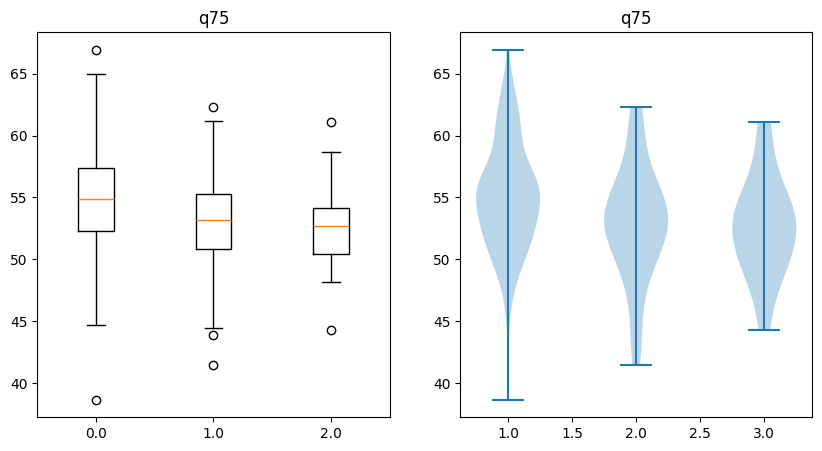

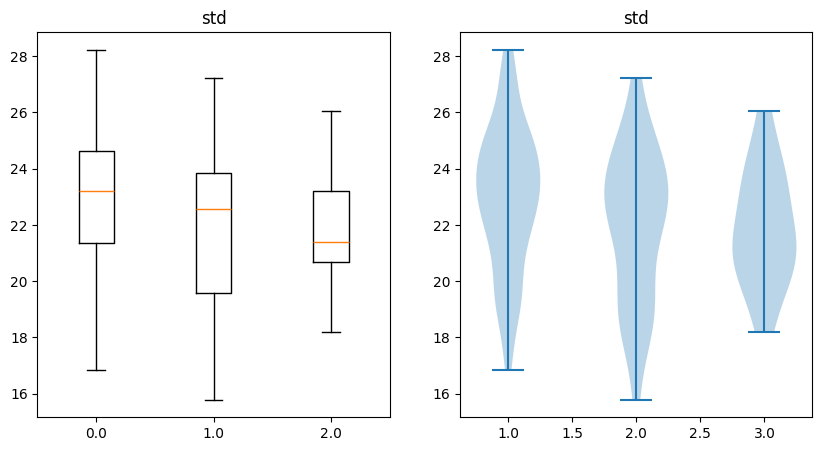

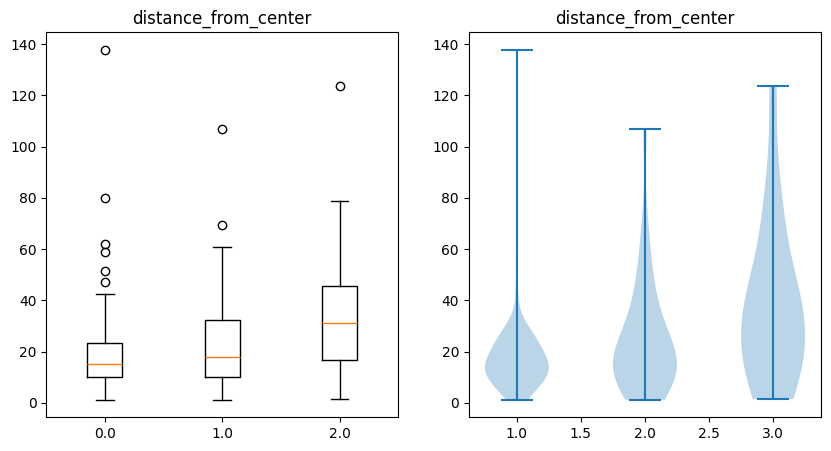

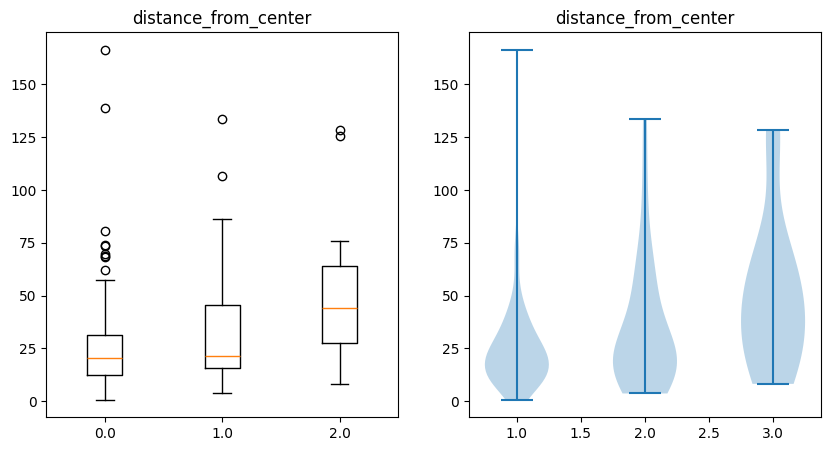

In [224]:
# boxplot for a highly correlated feature on the x axis and the label on the y axis

# get the index of the feature
feature_idx = 1
feature_name = features_label_dict["graph_1"][feature_idx]

# get the feature values for all graphs
feature_values = graph_1_corr[:, feature_idx].numpy()
label_values = graph_1_corr[:, -1].numpy()

def plot_boxplot(feature_values, label_values, feature_name):
    # group the feature values by label
    grouped_data = [feature_values[label_values == label] for label in set(label_values)]

    # plot the boxplot
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].boxplot(grouped_data, labels=set(label_values))
    ax[0].set_title(feature_name)
    ax[1].violinplot(grouped_data)
    ax[1].set_title(feature_name)
    plt.show()
    plt.close()

for idx in range(len(features_label_dict["graph_1"])):
    feature_name = features_label_dict["graph_1"][idx]
    feature_values = graph_1_corr[:, idx].numpy()
    plot_boxplot(feature_values, label_values, feature_name)

# plot for graph 2 features

for idx in range(len(features_label_dict["graph_2"])):
    feature_name = features_label_dict["graph_2"][idx]
    feature_values = graph_2_corr[:, idx].numpy()
    plot_boxplot(feature_values, label_values, feature_name)

# create the distance from center feature
# get the position of centroid-0 and centroid-1
centroid_0_idx = features_label_dict["graph_1"].index("centroid-0")
centroid_1_idx = features_label_dict["graph_1"].index("centroid-1")
# calculate the distance to the point 600, 600
dist_cent = np.sqrt((X_vessel[:,centroid_0_idx] - 600)**2 + (X_vessel[:,centroid_1_idx] - 600)**2)
# add the distance to the features
plot_boxplot(dist_cent, label_values, "distance_from_center")

# create the distance from center feature for graph 2
# get the position of centroid-0 and centroid-1
centroid_0_idx = features_label_dict["graph_2"].index("centroid-0")
centroid_1_idx = features_label_dict["graph_2"].index("centroid-1")
# calculate the distance to the point 600, 600
dist_cent = np.sqrt((X_void[:,centroid_0_idx] - 600)**2 + (X_void[:,centroid_1_idx] - 600)**2)
# add the distance to the features
plot_boxplot(dist_cent, label_values, "distance_from_center")

NameError: name 'test_dataset_DCP' is not defined

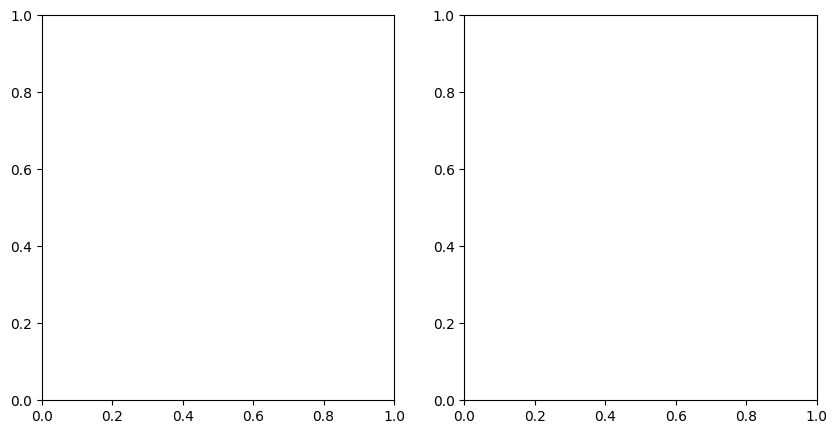

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
graph_2D.HeteroGraphPlotter2D().plot_graph_2D(test_dataset_DCP.hetero_graphs["0533_OS"], edges= True, ax=ax[0])
graph_2D.HeteroGraphPlotter2D().plot_graph_2D(test_dataset_SCP.hetero_graphs["0533_OS"], edges= True, ax=ax[1])

# dcp is way denser than scp